In [ ]:
# your code here
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!python --version

Python 3.8.16


In [ ]:
!sudo apt-get update -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.ne

In [ ]:
!sudo apt-get install python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,448 kB of archives.
After this operation, 22.5 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.7-minimal amd64 3.7.16-1+bionic1 [589 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.7-minimal amd64 3.7.16-1+bionic1 [1,725 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main am

In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

In [ ]:
!sudo update-alternatives --config python3

There are 3 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.8   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   1         manual mode
  3            /usr/bin/python3.8   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/bin/python3.7 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
!python --version

Python 3.7.16


In [ ]:
from time import time
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras import Sequential
from keras import backend 
from keras.models import Model
from keras.layers import Conv1D , Dropout
from keras.layers import Bidirectional
from keras.layers import Lambda
from keras.layers import MaxPooling1D , GlobalMaxPooling1D
from keras.layers import Flatten , Dense , Input ,concatenate , Activation
from keras.layers import Dense, Dropout, LSTM, Bidirectional , SimpleRNN
from keras.regularizers import l2 ,L1L2
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras import regularizers
from keras.optimizers import adam_v2

In [ ]:
# Defnining a handy function in order to plot various models accuracy and loss progress
import matplotlib as mpl

def plot_acc_loss(history):
  mpl.rcParams['figure.figsize'] = (12, 10)
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

# OOV Zero

In [ ]:
import re, string

# Stopwords are frequently-used words (such as “the”, “a”, “an”, “in”) that do not hold any meaning useful to extract sentiment.
# If it's your first time ever using nltk, you can download nltk's stopwords using: nltk.download('stopwords')


# A custom function defined in order to fine-tune the cleaning of the input text. This function is highly dependent on each usecase.
# Note: Only include misspelling or abbreviations of commonly used words.
#       Including many minimally present cases would negatively impact the performance. 



# This function will be our all-in-one noise removal function
def remove_noise5(tweet_tokens):

    cleaned_tokens = []

    for token in tweet_tokens:
        # token = token.lower()
        # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        token = re.sub(r'[0-9]+', '<NUMBER>', token)
        token = re.sub(r'[^\x00-\x7F]+','', token)
        token = token.replace("#", "").replace("_", " ")

        

        
        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if token not in string.punctuation :
            cleaned_tokens.append(token)
            
    return cleaned_tokens

In [ ]:
# Python program to store list to file using pickle module
import pickle

# with open('/content/gdrive/MyDrive/BSC-Project/Xtrain6', 'wb') as fp:
#         pickle.dump(X_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/Xtest6', 'wb') as fp:
#         pickle.dump(X_test, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/Ytrain6', 'wb') as fp:
#         pickle.dump(Y_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/Ytest6', 'wb') as fp:
#         pickle.dump(Y_test, fp)

with open('/content/gdrive/MyDrive/BSC-Project/Xtrain6', 'rb') as fp:
        X_train =  pickle.load(fp)
         
with open('/content/gdrive/MyDrive/BSC-Project/Xtest6', 'rb') as fp:
        X_test =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/Ytrain6', 'rb') as fp:
        Y_train =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/Ytest6', 'rb') as fp:
        Y_test =  pickle.load(fp)

In [ ]:
from nltk.tokenize import TweetTokenizer
# The reduce_len parameter will allow a maximum of 3 consecutive repeating characters, while trimming the rest
# For example, it will tranform the word: 'Helloooooooooo' to: 'Hellooo'
tk = TweetTokenizer(reduce_len=True)

data_train = []
data_test = []

In [ ]:
for x, y in zip(X_train, Y_train):
    
        data_train.append((tk.tokenize(x), y))
           
# Printing the CPU time and the first 5 elements of our 'data' list
data_train[:5]

[(['It',
   'had',
   'partnered',
   'with',
   'the',
   '#Russian',
   'Direct',
   'Investment',
   'Fund',
   '(',
   'RDIF',
   ')',
   'in',
   'September',
   '2020',
   'to',
   'conduct',
   'clinical',
   'trials',
   'for',
   '#SputnikV',
   '.',
   'https://t.co/TAlQlELsoR'],
  1),
 (['A',
   'batch',
   'of',
   'China-donated',
   '#Sinopharm',
   'vaccine',
   'arrived',
   'in',
   'Brazzaville',
   ',',
   'capital',
   'of',
   'the',
   'Republic',
   'of',
   '#Congo',
   ',',
   'on',
   'Wednesday',
   '.',
   'Congolese',
   'health',
   'minister',
   ',',
   'minister',
   'of',
   'foreign',
   'affairs',
   ',',
   'national',
   'defense',
   'minister',
   'and',
   'Chinese',
   'ambassador',
   'to',
   'the',
   'Congo',
   'welcomed',
   'the',
   'vaccine',
   'at',
   'the',
   'airport',
   '.',
   'https://t.co/ltF0ZZ87mx'],
  1),
 (['The',
   'Colombo',
   'Municipal',
   'Council',
   '(',
   'CMC',
   ')',
   'is',
   'to',
   'inoculate',
   '

In [ ]:
for x, y in zip(X_test, Y_test):
    
        data_test.append((tk.tokenize(x), y))
           
# Printing the CPU time and the first 5 elements of our 'data' list
data_test[:5]

[(['Got',
   'to',
   'admit',
   ',',
   '#Moderna',
   'second',
   'round',
   'took',
   'me',
   'for',
   'a',
   'quite',
   'a',
   'ride',
   'there',
   'overnight',
   '.',
   'They',
   'weren',
   '\x92',
   't',
   'messing',
   'around',
   'with',
   'these',
   'vaccines'],
  0),
 (['U',
   '.',
   'S',
   '.',
   '#scientists',
   'doubtful',
   'of',
   '#one-shot',
   'regimen',
   'for',
   '#Pfizer',
   ',',
   '#Moderna',
   '#COVID',
   '#vaccines',
   ':',
   '#WSJ',
   '#reuters',
   'https://t.co/jz0whryYnf',
   '#mrna',
   '#us',
   '#bidenharris',
   '#health',
   '#world',
   '#biotech',
   '#mkt'],
  1),
 (['#COVID19Vaccination',
   'coverage',
   'in',
   'India',
   'as',
   'of',
   '8',
   'AM',
   '|',
   '04.04',
   '.',
   '2021',
   'Total',
   'Beneficiaries',
   'Vaccinated',
   ':',
   '7,59',
   ',',
   '79,651',
   '27,38',
   ',',
   '972',
   'were',
   'vaccinated',
   'in',
   'last',
   '24',
   'hours',
   '.',
   'For',
   '1st',
   'D

In [ ]:
cleaned_tokens_list_train = []

# Removing noise from all the data
for tokens, label in data_train:
    cleaned_tokens_list_train.append((remove_noise5(tokens), label))

In [ ]:
cleaned_tokens_list_test = []

# Removing noise from all the data
for tokens, label in data_test:
    cleaned_tokens_list_test.append((remove_noise5(tokens), label))

In [ ]:
sentences_array_train = [s[0] for s in cleaned_tokens_list_train]
sentences_train = []

for s in sentences_array_train :
  sentence_train = ' '.join(map(str ,s))
  sentences_train.append(sentence_train)

print(len(sentences_train))
print(sentences_train[0])
print(sentences_array_train[0])

4800
It had partnered with the Russian Direct Investment Fund RDIF in September <NUMBER> to conduct clinical trials for SputnikV
['It', 'had', 'partnered', 'with', 'the', 'Russian', 'Direct', 'Investment', 'Fund', 'RDIF', 'in', 'September', '<NUMBER>', 'to', 'conduct', 'clinical', 'trials', 'for', 'SputnikV']


In [ ]:
all_train_words = []

for s in sentences_array_train:
  for w in s :
    all_train_words.append(w)

print('All train word : {}'.format(len(all_train_words)))

unique_train_word = []

for w in all_train_words:
  if w not in unique_train_word:
    unique_train_word.append(w)
    

print('unique train word : {}'.format(len(unique_train_word)))

All train word : 120561
unique train word : 15087


In [ ]:
sentences_array_test = [s[0] for s in cleaned_tokens_list_test]
sentences_test = []

for s in sentences_array_test :
  sentence_test = ' '.join(map(str ,s))
  sentences_test.append(sentence_test)

print(sentences_test[0])
print(sentences_array_test[0])

Got to admit Moderna second round took me for a quite a ride there overnight They weren t messing around with these vaccines
['Got', 'to', 'admit', 'Moderna', 'second', 'round', 'took', 'me', 'for', 'a', 'quite', 'a', 'ride', 'there', 'overnight', 'They', 'weren', 't', 'messing', 'around', 'with', 'these', 'vaccines']


In [ ]:
all_test_words = []

for s in sentences_array_test:
  for w in s :
    all_test_words.append(w)

print('All test word : {}'.format(len(all_test_words)))

unique_test_word = []

for w in all_test_words:
  if w not in unique_test_word:
    unique_test_word.append(w)

print('unique train word : {}'.format(len(unique_test_word)))

All test word : 29912
unique train word : 6218


In [ ]:
all_unique_words = []

for word in unique_train_word:
  if word not in all_unique_words :
    all_unique_words.append(word)

for word in unique_test_word:
  if word not in all_unique_words :
    all_unique_words.append(word)

print("Number of All unique word : {}".format(len(all_unique_words)))

Number of All unique word : 17230


In [ ]:
word_to_index = {}
i = 1

for word in all_unique_words :
  word_to_index[word] = i
  i+=1

word_to_index

{'It': 1,
 'had': 2,
 'partnered': 3,
 'with': 4,
 'the': 5,
 'Russian': 6,
 'Direct': 7,
 'Investment': 8,
 'Fund': 9,
 'RDIF': 10,
 'in': 11,
 'September': 12,
 '<NUMBER>': 13,
 'to': 14,
 'conduct': 15,
 'clinical': 16,
 'trials': 17,
 'for': 18,
 'SputnikV': 19,
 'A': 20,
 'batch': 21,
 'of': 22,
 'China-donated': 23,
 'Sinopharm': 24,
 'vaccine': 25,
 'arrived': 26,
 'Brazzaville': 27,
 'capital': 28,
 'Republic': 29,
 'Congo': 30,
 'on': 31,
 'Wednesday': 32,
 'Congolese': 33,
 'health': 34,
 'minister': 35,
 'foreign': 36,
 'affairs': 37,
 'national': 38,
 'defense': 39,
 'and': 40,
 'Chinese': 41,
 'ambassador': 42,
 'welcomed': 43,
 'at': 44,
 'airport': 45,
 'The': 46,
 'Colombo': 47,
 'Municipal': 48,
 'Council': 49,
 'CMC': 50,
 'is': 51,
 'inoculate': 52,
 '<NUMBER>,<NUMBER>': 53,
 'nationals': 54,
 'from': 55,
 'Monday': 56,
 'using': 57,
 'Read': 58,
 'full': 59,
 'story': 60,
 'here': 61,
 'via': 62,
 'Srilanka': 63,
 'lka': 64,
 'China': 65,
 'colombo': 66,
 'This': 67

In [ ]:
list_len_train = [len(i.split()) for i in sentences_train]
max_len_train = max(list_len_train)
print('max_len:', max_len_train)

max_len: 60


In [ ]:
list_len_test = [len(i.split()) for i in sentences_test]
max_len_test = max(list_len_test)
print('max_len:', max_len_test)

max_len: 54


In [ ]:
from gensim.models import Word2Vec
w2v_model = Word2Vec.load("/content/gdrive/MyDrive/BSC-Project/w2v_300d_7.model")

In [ ]:
EMBEDDING_DIM=100

UNK = 0



for word  in unique_train_word:

      try:
           embedding_vector = w2v_model.wv[word]
           
      except :
        UNK += 1
        
        

print('OOV Train : {}'.format(UNK))

OOV Train : 0


In [ ]:
EMBEDDING_DIM=100

UNK = 0


for word in unique_test_word:

      try:
           embedding_vector = w2v_model.wv[word]
           
      except :
        UNK += 1
        
       
         
print('OOV Test: {}'.format(UNK)) 

OOV Test: 197


In [ ]:
EMBEDDING_DIM=100
embedding_matrix = np.zeros((len(word_to_index)+1, EMBEDDING_DIM))
UNK = 0

i = 0
for word,i in word_to_index.items():

      try:
           embedding_vector = w2v_model.wv[word]
           embedding_matrix[i] = embedding_vector
      except :
        UNK += 1
        
        
print('Number of all unique train word = {}'.format(len(word_to_index)))       
print('Number of OOV Train = {}'.format(UNK))    
print(embedding_matrix.shape)
print(embedding_matrix[21])

with open('/content/gdrive/MyDrive/BSC-Project/embedMatrix12', 'wb') as fp:
        pickle.dump(embedding_matrix, fp)

Number of all unique train word = 17230
Number of OOV Train = 197
(17231, 100)
[-0.15686825 -0.0557613   0.32904592 -0.12882128  0.20509587  0.21521436
  0.6278317  -1.342291    0.55375844  0.11973358 -0.21493977 -0.07543492
  0.33000383 -0.24911988  0.09218241 -0.45896035 -0.98536289  0.07218886
 -0.3142229  -0.08863966  0.79529166  0.54140633  0.12177644  0.29856974
 -0.01553513  0.03490803 -0.09268345 -0.34594768  0.2672779   0.08138833
  0.46763897 -0.40017515 -0.37672535 -0.84937954 -0.98142332  0.21633719
  0.05693539 -0.28278464  0.70553666 -0.12299018 -0.53136933  0.55299217
 -0.55297893  0.03193011 -0.25657165 -0.44155937  0.25513464  0.29240334
 -0.95126486 -0.14364654 -0.03768465  0.40501851  0.71834052 -0.18297854
 -0.2055957   0.57904953  0.16629437 -0.46495041  0.55180627  0.82935214
  0.07605773 -0.05763659 -0.06870662 -0.76314449  0.29104483 -0.05768737
 -0.04043188 -0.55013162 -0.95159578  0.32563046 -0.11357542 -0.34766573
 -0.11801147 -0.60051876 -0.80825579  0.22219

In [ ]:
# Python program to store list to file using pickle module
import pickle

# with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'wb') as fp:
#         pickle.dump(X_padded_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'wb') as fp:
#         pickle.dump(X_padded_test, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'wb') as fp:
#         pickle.dump(Y_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'wb') as fp:
#         pickle.dump(Y_test, fp)

with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'rb') as fp:
        X_train =  pickle.load(fp)
         
with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'rb') as fp:
        X_test =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'rb') as fp:
        Y_train =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'rb') as fp:
        Y_test =  pickle.load(fp)

In [ ]:
with open('/content/gdrive/MyDrive/BSC-Project/embedMatrix12', 'rb') as fp:
        embedding_matrix = pickle.load(fp)

# LSTM1

In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model1.add(Dropout(rate=0.4))
model1.add(LSTM(units=128, return_sequences=False))
model1.add(Dense(units=3, activation='softmax'))
model1.summary()

# tweet_input = Input(shape=(60,), dtype='int32')
# tweet_encoder = Embedding(input_dim=17231 ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False)(tweet_input)
# merged = Dropout(0.3)(tweet_encoder)
# merged = LSTM(units=128, return_sequences=False)(merged)
# merged = Dense(3)(merged)
# output = Activation('softmax')(merged)
# model = Model(inputs=[tweet_input], outputs=[output])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           1723100   
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,840,735
Trainable params: 117,635
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 12s 130ms/step - loss: 0.8778 - accuracy: 0.6060 - val_loss: 0.8211 - val_accuracy: 0.6104
Epoch 2/10
60/60 [==============================] - 7s 115ms/step - loss: 0.8217 - accuracy: 0.6115 - val_loss: 0.7936 - val_accuracy: 0.6115
Epoch 3/10
60/60 [==============================] - 7s 115ms/step - loss: 0.7886 - accuracy: 0.6151 - val_loss: 0.7836 - val_accuracy: 0.6198
Epoch 4/10
60/60 [==============================] - 7s 115ms/step - loss: 0.7712 - accuracy: 0.6398 - val_loss: 0.7575 - val_accuracy: 0.6521
Epoch 5/10
60/60 [==============================] - 7s 114ms/step - loss: 0.7455 - accuracy: 0.6745 - val_loss: 0.7206 - val_accuracy: 0.7115
Epoch 6/10
60/60 [==============================] - 7s 116ms/step - loss: 0.7417 - accuracy: 0.6706 - val_loss: 0.7061 - val_accuracy: 0.7021
Epoch 7/10
60/60 [==============================] - 7s 114ms/step - loss: 0.7044 - accuracy: 0.6958 - val_loss: 0.6797 - val_accuracy: 0.7125
Epoch

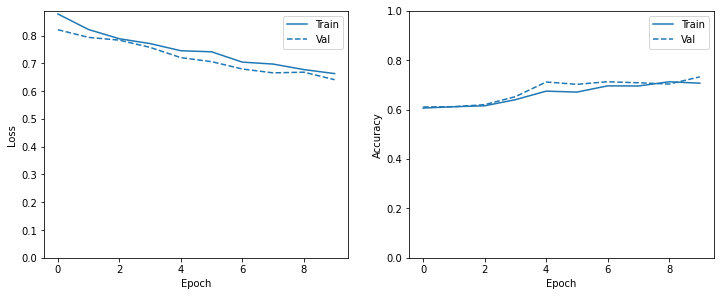

In [ ]:
model1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model1.history)
# print(model.history)

In [ ]:
prediction_prob = model1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 2s 31ms/step
Accuracy of prediction on test set :  0.7275
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.77      0.83      0.80       736
           2       0.65      0.69      0.67       380

    accuracy                           0.73      1200
   macro avg       0.47      0.51      0.49      1200
weighted avg       0.68      0.73      0.70      1200



In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model.add(Dropout(rate=0.4))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,958,367
Trainable params: 235,267
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 17s 225ms/step - loss: 0.8167 - accuracy: 0.6326 - val_loss: 0.7163 - val_accuracy: 0.7125
Epoch 2/10
60/60 [==============================] - 13s 210ms/step - loss: 0.7209 - accuracy: 0.6917 - val_loss: 0.6655 - val_accuracy: 0.7292
Epoch 3/10
60/60 [==============================] - 13s 210ms/step - loss: 0.6808 - accuracy: 0.7039 - val_loss: 0.6570 - val_accuracy: 0.7167
Epoch 4/10
60/60 [==============================] - 13s 214ms/step - loss: 0.6779 - accuracy: 0.7034 - val_loss: 0.6420 - val_accuracy: 0.7292
Epoch 5/10
60/60 [==============================] - 14s 234ms/step - loss: 0.6610 - accuracy: 0.7060 - val_loss: 0.6311 - val_accuracy: 0.7323
Epoch 6/10
60/60 [==============================] - 13s 218ms/step - loss: 0.6477 - accuracy: 0.7156 - val_loss: 0.6335 - val_accuracy: 0.7281
Epoch 7/10
60/60 [==============================] - 13s 216ms/step - loss: 0.6457 - accuracy: 0.7169 - val_loss: 0.6474 - val_accuracy: 0.7323

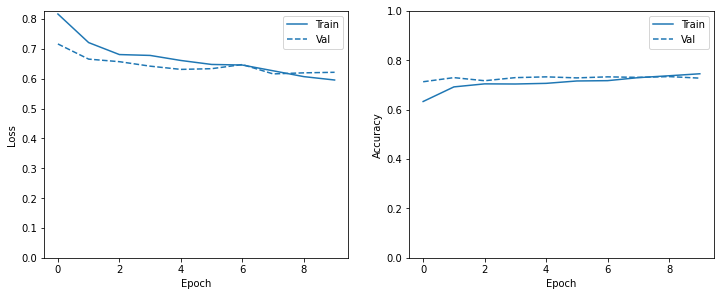

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 3s 51ms/step
Accuracy of prediction on test set :  0.7175
              precision    recall  f1-score   support

           0       0.23      0.04      0.06        84
           1       0.75      0.84      0.79       736
           2       0.66      0.64      0.65       380

    accuracy                           0.72      1200
   macro avg       0.55      0.50      0.50      1200
weighted avg       0.69      0.72      0.70      1200



# LSTM2

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dropout(rate=0.3))
model2.add(Dense(units=3, activation='softmax'))
model2.summary()


# tweet_input = Input(shape=(60,), dtype='int32')
# tweet_encoder = Embedding(input_dim=17231 ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False)(tweet_input)
# merged = LSTM(units=50, return_sequences=False)(tweet_encoder)
# merged = Dropout(0.3)(merged)
# merged = Dense(3)(merged)
# output = Activation('softmax')(merged)
# model = Model(inputs=[tweet_input], outputs=[output])
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,753,453
Trainable params: 30,353
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 4s 42ms/step - loss: 0.9223 - accuracy: 0.6010 - val_loss: 0.8572 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 2s 33ms/step - loss: 0.8503 - accuracy: 0.6125 - val_loss: 0.8258 - val_accuracy: 0.6104
Epoch 3/10
60/60 [==============================] - 2s 34ms/step - loss: 0.8140 - accuracy: 0.6128 - val_loss: 0.8049 - val_accuracy: 0.6052
Epoch 4/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7797 - accuracy: 0.6130 - val_loss: 0.7899 - val_accuracy: 0.6187
Epoch 5/10
60/60 [==============================] - 2s 33ms/step - loss: 0.7564 - accuracy: 0.6313 - val_loss: 0.7430 - val_accuracy: 0.6448
Epoch 6/10
60/60 [==============================] - 2s 33ms/step - loss: 0.7407 - accuracy: 0.6474 - val_loss: 0.7144 - val_accuracy: 0.6740
Epoch 7/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7118 - accuracy: 0.6820 - val_loss: 0.6862 - val_accuracy: 0.7177
Epoch 8/10
60

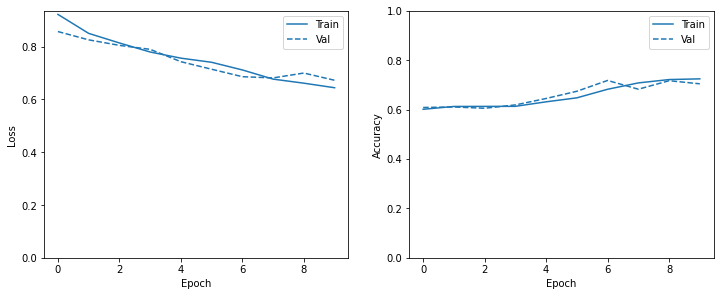

In [ ]:
model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model2.history)
# print(model.history)

In [ ]:
prediction_prob = model2.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 9ms/step
Accuracy of prediction on test set :  0.7291666666666666
              precision    recall  f1-score   support

           0       0.21      0.04      0.06        84
           1       0.72      0.93      0.81       736
           2       0.79      0.48      0.60       380

    accuracy                           0.73      1200
   macro avg       0.58      0.48      0.49      1200
weighted avg       0.71      0.73      0.69      1200



In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model2.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model2.add(Dropout(rate=0.3))
model2.add(Dense(units=3, activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,783,803
Trainable params: 60,703
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 73ms/step - loss: 0.8728 - accuracy: 0.5914 - val_loss: 0.7791 - val_accuracy: 0.6406
Epoch 2/10
60/60 [==============================] - 4s 59ms/step - loss: 0.7607 - accuracy: 0.6768 - val_loss: 0.7235 - val_accuracy: 0.7156
Epoch 3/10
60/60 [==============================] - 4s 60ms/step - loss: 0.7018 - accuracy: 0.7016 - val_loss: 0.6775 - val_accuracy: 0.7104
Epoch 4/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6734 - accuracy: 0.7104 - val_loss: 0.6445 - val_accuracy: 0.7208
Epoch 5/10
60/60 [==============================] - 4s 60ms/step - loss: 0.6421 - accuracy: 0.7159 - val_loss: 0.6246 - val_accuracy: 0.7344
Epoch 6/10
60/60 [==============================] - 4s 60ms/step - loss: 0.6170 - accuracy: 0.7328 - val_loss: 0.6127 - val_accuracy: 0.7240
Epoch 7/10
60/60 [==============================] - 4s 60ms/step - loss: 0.5970 - accuracy: 0.7388 - val_loss: 0.6194 - val_accuracy: 0.7312
Epoch 8/10
60

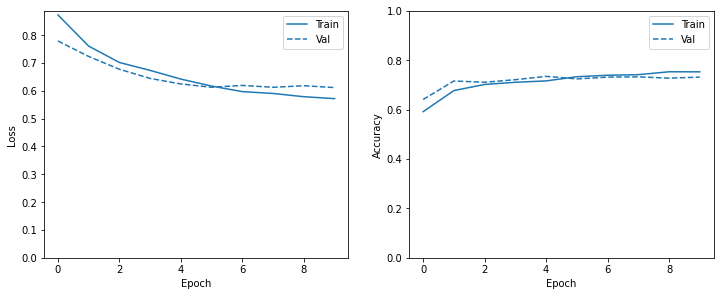

In [ ]:
model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model2.history)
# print(model.history)

In [ ]:
prediction_prob = model2.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 14ms/step
Accuracy of prediction on test set :  0.7141666666666666
              precision    recall  f1-score   support

           0       0.62      0.06      0.11        84
           1       0.77      0.80      0.78       736
           2       0.62      0.69      0.65       380

    accuracy                           0.71      1200
   macro avg       0.67      0.52      0.52      1200
weighted avg       0.71      0.71      0.70      1200



# LSTM3

In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model3.add(LSTM(units=100, return_sequences=True))
model3.add(LSTM(units=200, return_sequences=False))
model3.add(Dropout(rate=0.3))
model3.add(Dense(units=3, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 200)               240800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 603       
                                                                 
Total params: 2,044,903
Trainable params: 321,803
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 21s 311ms/step - loss: 0.8734 - accuracy: 0.6104 - val_loss: 0.8483 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 18s 298ms/step - loss: 0.8348 - accuracy: 0.6083 - val_loss: 0.8100 - val_accuracy: 0.6021
Epoch 3/10
60/60 [==============================] - 18s 296ms/step - loss: 0.7893 - accuracy: 0.6240 - val_loss: 0.7561 - val_accuracy: 0.6313
Epoch 4/10
60/60 [==============================] - 18s 298ms/step - loss: 0.7468 - accuracy: 0.6667 - val_loss: 0.7351 - val_accuracy: 0.7115
Epoch 5/10
60/60 [==============================] - 18s 300ms/step - loss: 0.7121 - accuracy: 0.7029 - val_loss: 0.6978 - val_accuracy: 0.6948
Epoch 6/10
60/60 [==============================] - 18s 300ms/step - loss: 0.6913 - accuracy: 0.7057 - val_loss: 0.6836 - val_accuracy: 0.7083
Epoch 7/10
60/60 [==============================] - 20s 323ms/step - loss: 0.6642 - accuracy: 0.7242 - val_loss: 0.6666 - val_accuracy: 0.7250

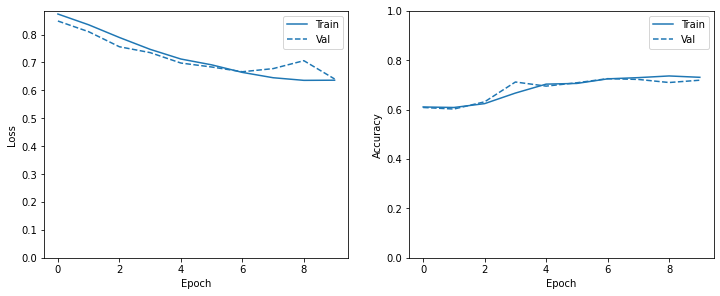

In [ ]:
model3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model3.history)
# print(model.history)

In [ ]:
prediction_prob = model3.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 3s 68ms/step
Accuracy of prediction on test set :  0.7316666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.72      0.94      0.81       736
           2       0.80      0.48      0.60       380

    accuracy                           0.73      1200
   macro avg       0.51      0.48      0.47      1200
weighted avg       0.69      0.73      0.69      1200



In [ ]:
model3.save('/content/gdrive/MyDrive/BSC-Project/saved_model/lstm3_oov0.h5')

In [ ]:
test_model = keras.models.load_model('/content/gdrive/MyDrive/BSC-Project/saved_model/lstm3_oov0.h5')
# test_model.summary()
label = test_model.predict(["It is great"])
label

ValueError: ignored

In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model3.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model3.add(Bidirectional(LSTM(units=200, return_sequences=False)))
model3.add(Dropout(rate=0.3))
model3.add(Dense(units=3, activation='softmax'))
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 bidirectional_2 (Bidirectio  (None, 60, 200)          160800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              641600    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 2,526,703
Trainable params: 803,603
Non-

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 53s 730ms/step - loss: 0.7953 - accuracy: 0.6495 - val_loss: 0.6965 - val_accuracy: 0.7167
Epoch 2/10
60/60 [==============================] - 43s 718ms/step - loss: 0.6862 - accuracy: 0.7091 - val_loss: 0.6771 - val_accuracy: 0.7094
Epoch 3/10
60/60 [==============================] - 48s 801ms/step - loss: 0.6497 - accuracy: 0.7182 - val_loss: 0.6242 - val_accuracy: 0.7333
Epoch 4/10
60/60 [==============================] - 46s 765ms/step - loss: 0.6296 - accuracy: 0.7310 - val_loss: 0.6236 - val_accuracy: 0.7354
Epoch 5/10
60/60 [==============================] - 60s 1s/step - loss: 0.5966 - accuracy: 0.7391 - val_loss: 0.6077 - val_accuracy: 0.7354
Epoch 6/10
60/60 [==============================] - 39s 658ms/step - loss: 0.5950 - accuracy: 0.7424 - val_loss: 0.6931 - val_accuracy: 0.6969
Epoch 7/10
60/60 [==============================] - 40s 663ms/step - loss: 0.5791 - accuracy: 0.7474 - val_loss: 0.6063 - val_accuracy: 0.7479
Ep

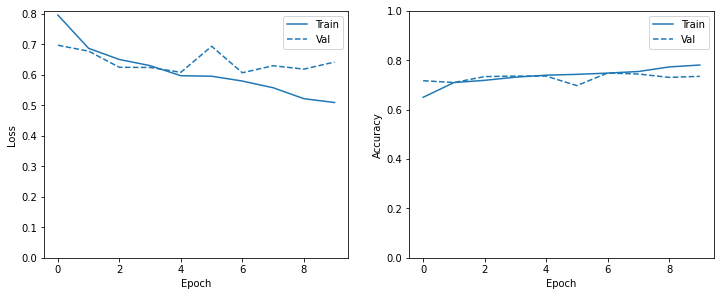

In [ ]:
model3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model3.history)
# print(model.history)

In [ ]:
prediction_prob = model3.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 6s 123ms/step
Accuracy of prediction on test set :  0.7183333333333334
              precision    recall  f1-score   support

           0       0.33      0.10      0.15        84
           1       0.76      0.81      0.79       736
           2       0.65      0.67      0.66       380

    accuracy                           0.72      1200
   macro avg       0.58      0.53      0.53      1200
weighted avg       0.70      0.72      0.70      1200



# LSTM4

In [ ]:
model4 = Sequential()
model4.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model4.add(LSTM(units=10, return_sequences=True))
model4.add(LSTM(units=20, return_sequences=True))
model4.add(LSTM(units=30, return_sequences=False))
model4.add(Dropout(rate=0.3))
model4.add(Dense(units=3, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lstm_4 (LSTM)               (None, 60, 10)            4440      
                                                                 
 lstm_5 (LSTM)               (None, 60, 20)            2480      
                                                                 
 lstm_6 (LSTM)               (None, 30)                6120      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,736,233
Trainable params: 13,133
Non-t

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 10s 75ms/step - loss: 0.9208 - accuracy: 0.5958 - val_loss: 0.8554 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 3s 54ms/step - loss: 0.8581 - accuracy: 0.6148 - val_loss: 0.8439 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 3s 54ms/step - loss: 0.8288 - accuracy: 0.6128 - val_loss: 0.7819 - val_accuracy: 0.6344
Epoch 4/10
60/60 [==============================] - 3s 53ms/step - loss: 0.7889 - accuracy: 0.6406 - val_loss: 0.7543 - val_accuracy: 0.6781
Epoch 5/10
60/60 [==============================] - 3s 53ms/step - loss: 0.7400 - accuracy: 0.6818 - val_loss: 0.7380 - val_accuracy: 0.7021
Epoch 6/10
60/60 [==============================] - 3s 54ms/step - loss: 0.6988 - accuracy: 0.7081 - val_loss: 0.6998 - val_accuracy: 0.6958
Epoch 7/10
60/60 [==============================] - 3s 54ms/step - loss: 0.6747 - accuracy: 0.7188 - val_loss: 0.6948 - val_accuracy: 0.7000
Epoch 8/10
6

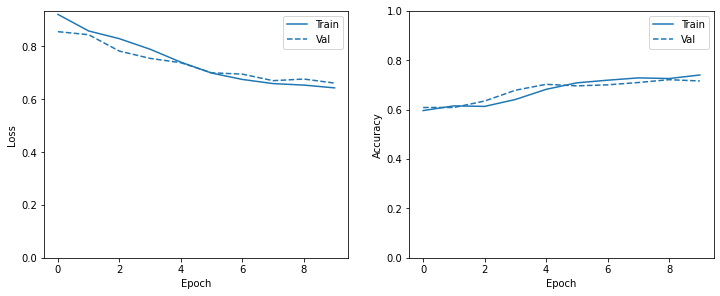

In [ ]:
model4.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model4.history)
# print(model.history)

In [ ]:
prediction_prob = model4.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 2s 16ms/step
Accuracy of prediction on test set :  0.73
              precision    recall  f1-score   support

           0       0.25      0.01      0.02        84
           1       0.76      0.85      0.80       736
           2       0.67      0.66      0.66       380

    accuracy                           0.73      1200
   macro avg       0.56      0.51      0.50      1200
weighted avg       0.70      0.73      0.70      1200



In [ ]:
model4 = Sequential()
model4.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model4.add(Bidirectional(LSTM(units=10, return_sequences=True)))
model4.add(Bidirectional(LSTM(units=20, return_sequences=True)))
model4.add(Bidirectional(LSTM(units=30, return_sequences=False)))
model4.add(Dropout(rate=0.3))
model4.add(Dense(units=3, activation='softmax'))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 bidirectional_4 (Bidirectio  (None, 60, 20)           8880      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 60, 40)           6560      
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 60)               17040     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 60)                0         
                                                      

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 16s 133ms/step - loss: 0.8771 - accuracy: 0.6068 - val_loss: 0.7945 - val_accuracy: 0.6187
Epoch 2/10
60/60 [==============================] - 6s 94ms/step - loss: 0.7776 - accuracy: 0.6544 - val_loss: 0.7287 - val_accuracy: 0.6990
Epoch 3/10
60/60 [==============================] - 6s 95ms/step - loss: 0.7192 - accuracy: 0.6961 - val_loss: 0.6878 - val_accuracy: 0.7146
Epoch 4/10
60/60 [==============================] - 6s 94ms/step - loss: 0.6790 - accuracy: 0.7130 - val_loss: 0.6704 - val_accuracy: 0.7156
Epoch 5/10
60/60 [==============================] - 6s 96ms/step - loss: 0.6533 - accuracy: 0.7214 - val_loss: 0.6660 - val_accuracy: 0.7021
Epoch 6/10
60/60 [==============================] - 6s 95ms/step - loss: 0.6308 - accuracy: 0.7312 - val_loss: 0.6496 - val_accuracy: 0.7229
Epoch 7/10
60/60 [==============================] - 6s 96ms/step - loss: 0.6128 - accuracy: 0.7380 - val_loss: 0.6440 - val_accuracy: 0.7271
Epoch 8/10


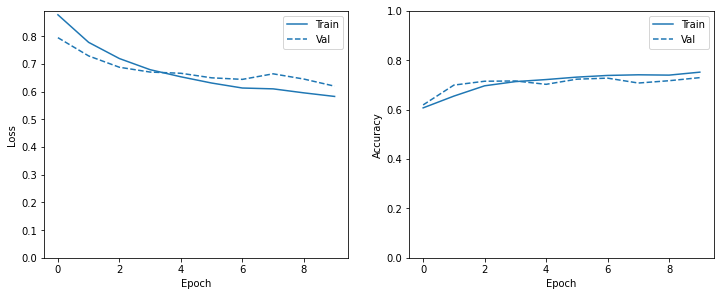

In [ ]:
model4.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model4.history)
# print(model.history)

In [ ]:
prediction_prob = model4.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 3s 23ms/step
Accuracy of prediction on test set :  0.7341666666666666
              precision    recall  f1-score   support

           0       0.37      0.17      0.23        84
           1       0.74      0.89      0.81       736
           2       0.75      0.56      0.64       380

    accuracy                           0.73      1200
   macro avg       0.62      0.54      0.56      1200
weighted avg       0.72      0.73      0.72      1200



# LSTM5

In [ ]:
model5 = Sequential()
model5.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model5.add(LSTM(units=50, return_sequences=False))
model5.add(Dropout(rate=0.4))
model5.add(Dense(units=3, activation='softmax'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,753,453
Trainable params: 30,353
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model5.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 4s 42ms/step - loss: 0.9372 - accuracy: 0.6065 - val_loss: 0.8488 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 2s 33ms/step - loss: 0.8496 - accuracy: 0.6120 - val_loss: 0.8450 - val_accuracy: 0.6094
Epoch 3/10
60/60 [==============================] - 2s 33ms/step - loss: 0.8180 - accuracy: 0.6102 - val_loss: 0.8026 - val_accuracy: 0.6062
Epoch 4/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7888 - accuracy: 0.6128 - val_loss: 0.7732 - val_accuracy: 0.6146
Epoch 5/10
60/60 [==============================] - 2s 33ms/step - loss: 0.7679 - accuracy: 0.6211 - val_loss: 0.7748 - val_accuracy: 0.6521
Epoch 6/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7443 - accuracy: 0.6633 - val_loss: 0.7653 - val_accuracy: 0.6552
Epoch 7/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7192 - accuracy: 0.6865 - val_loss: 0.6969 - val_accuracy: 0.7198
Epoch 8/10
60

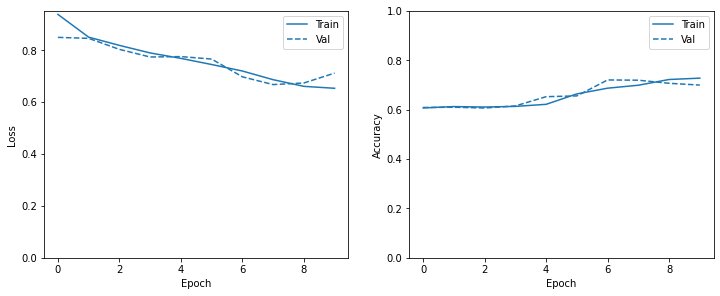

In [ ]:
model5.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model5.history)
# print(model.history)

In [ ]:
prediction_prob = model5.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 9ms/step
Accuracy of prediction on test set :  0.7008333333333333
              precision    recall  f1-score   support

           0       0.13      0.02      0.04        84
           1       0.76      0.78      0.77       736
           2       0.62      0.69      0.65       380

    accuracy                           0.70      1200
   macro avg       0.50      0.50      0.49      1200
weighted avg       0.67      0.70      0.68      1200



In [ ]:
model5 = Sequential()
model5.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model5.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model5.add(Dropout(rate=0.4))
model5.add(Dense(units=3, activation='softmax'))
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_7 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,783,803
Trainable params: 60,703
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model5.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 74ms/step - loss: 0.8706 - accuracy: 0.6018 - val_loss: 0.7915 - val_accuracy: 0.6833
Epoch 2/10
60/60 [==============================] - 4s 59ms/step - loss: 0.7621 - accuracy: 0.6687 - val_loss: 0.6938 - val_accuracy: 0.7094
Epoch 3/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6864 - accuracy: 0.7013 - val_loss: 0.6698 - val_accuracy: 0.7323
Epoch 4/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6658 - accuracy: 0.7086 - val_loss: 0.6432 - val_accuracy: 0.7115
Epoch 5/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6336 - accuracy: 0.7276 - val_loss: 0.6413 - val_accuracy: 0.7271
Epoch 6/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6173 - accuracy: 0.7302 - val_loss: 0.6326 - val_accuracy: 0.7115
Epoch 7/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6117 - accuracy: 0.7216 - val_loss: 0.6122 - val_accuracy: 0.7354
Epoch 8/10
60

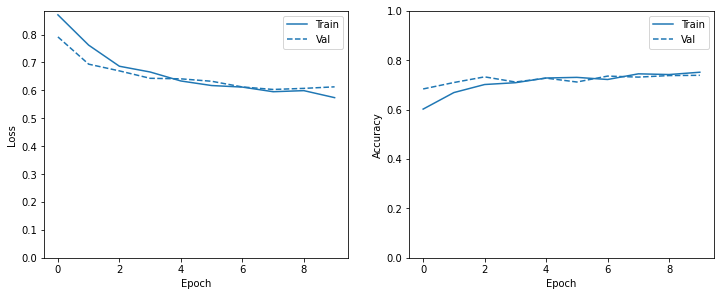

In [ ]:
model5.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model5.history)
# print(model.history)

In [ ]:
prediction_prob = model5.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 14ms/step
Accuracy of prediction on test set :  0.7466666666666667
              precision    recall  f1-score   support

           0       0.43      0.11      0.17        84
           1       0.77      0.87      0.82       736
           2       0.72      0.64      0.68       380

    accuracy                           0.75      1200
   macro avg       0.64      0.54      0.56      1200
weighted avg       0.73      0.75      0.73      1200



In [ ]:
model5.save('/content/gdrive/MyDrive/BSC-Project/saved_model/bilstm5_oov0.h5')

# LSTM6

In [ ]:
model6 = Sequential()
model6.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model6.add(LSTM(units=100, return_sequences=False))
model6.add(Dropout(rate=0.3))
model6.add(Dense(units=3, activation='softmax'))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,803,803
Trainable params: 80,703
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model6.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 95ms/step - loss: 0.8865 - accuracy: 0.6081 - val_loss: 0.8328 - val_accuracy: 0.6094
Epoch 2/10
60/60 [==============================] - 5s 86ms/step - loss: 0.8268 - accuracy: 0.6120 - val_loss: 0.8205 - val_accuracy: 0.6104
Epoch 3/10
60/60 [==============================] - 5s 86ms/step - loss: 0.7959 - accuracy: 0.6167 - val_loss: 0.7833 - val_accuracy: 0.6323
Epoch 4/10
60/60 [==============================] - 5s 87ms/step - loss: 0.7640 - accuracy: 0.6385 - val_loss: 0.7553 - val_accuracy: 0.6667
Epoch 5/10
60/60 [==============================] - 5s 86ms/step - loss: 0.7235 - accuracy: 0.6906 - val_loss: 0.7726 - val_accuracy: 0.6687
Epoch 6/10
60/60 [==============================] - 5s 86ms/step - loss: 0.7139 - accuracy: 0.6953 - val_loss: 0.6800 - val_accuracy: 0.7208
Epoch 7/10
60/60 [==============================] - 7s 121ms/step - loss: 0.6755 - accuracy: 0.7206 - val_loss: 0.6755 - val_accuracy: 0.7104
Epoch 8/10
6

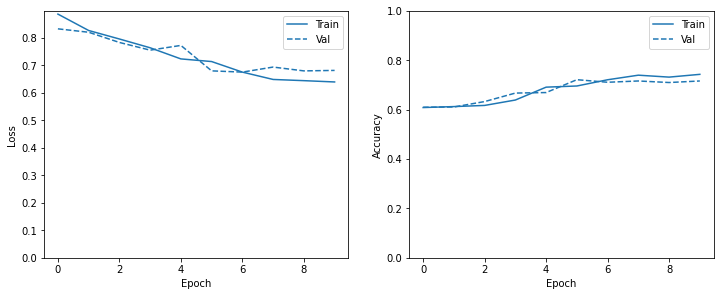

In [ ]:
model6.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model6.history)
# print(model.history)

In [ ]:
prediction_prob = model6.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 15ms/step
Accuracy of prediction on test set :  0.71
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        84
           1       0.81      0.75      0.78       736
           2       0.61      0.77      0.68       380

    accuracy                           0.71      1200
   macro avg       0.55      0.54      0.54      1200
weighted avg       0.71      0.71      0.70      1200



In [ ]:
model6 = Sequential()
model6.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model6.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model6.add(Dropout(rate=0.3))
model6.add(Dense(units=3, activation='softmax'))
model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_8 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 603       
                                                                 
Total params: 1,884,503
Trainable params: 161,403
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model6.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 13s 173ms/step - loss: 0.8224 - accuracy: 0.6242 - val_loss: 0.7230 - val_accuracy: 0.7104
Epoch 2/10
60/60 [==============================] - 9s 157ms/step - loss: 0.6982 - accuracy: 0.7057 - val_loss: 0.6459 - val_accuracy: 0.7281
Epoch 3/10
60/60 [==============================] - 12s 193ms/step - loss: 0.6596 - accuracy: 0.7128 - val_loss: 0.6388 - val_accuracy: 0.7240
Epoch 4/10
60/60 [==============================] - 10s 159ms/step - loss: 0.6632 - accuracy: 0.7120 - val_loss: 0.6413 - val_accuracy: 0.7365
Epoch 5/10
60/60 [==============================] - 9s 159ms/step - loss: 0.6283 - accuracy: 0.7297 - val_loss: 0.6419 - val_accuracy: 0.7385
Epoch 6/10
60/60 [==============================] - 9s 158ms/step - loss: 0.6092 - accuracy: 0.7404 - val_loss: 0.6116 - val_accuracy: 0.7312
Epoch 7/10
60/60 [==============================] - 10s 159ms/step - loss: 0.5928 - accuracy: 0.7388 - val_loss: 0.6241 - val_accuracy: 0.7260
Ep

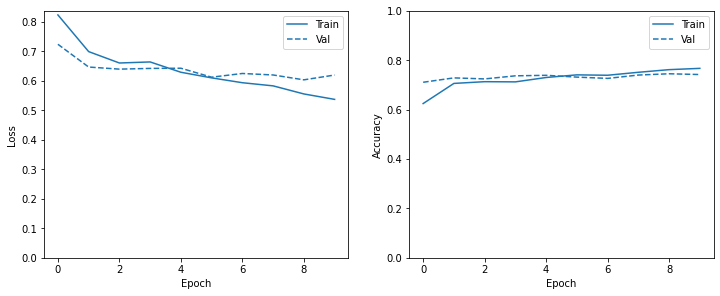

In [ ]:
model6.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model6.history)
# print(model.history)

In [ ]:
prediction_prob = model6.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 2s 22ms/step
Accuracy of prediction on test set :  0.7291666666666666
              precision    recall  f1-score   support

           0       0.35      0.27      0.31        84
           1       0.75      0.87      0.81       736
           2       0.75      0.56      0.64       380

    accuracy                           0.73      1200
   macro avg       0.62      0.57      0.58      1200
weighted avg       0.72      0.73      0.72      1200



# RNN1

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model.add(SimpleRNN(100 , activation='relu',return_sequences=True))
model.add(SimpleRNN(200 , activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 60, 100)           20100     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 200)               60200     
                                                                 
 dropout_14 (Dropout)        (None, 200)               0         
                                                                 
 flatten_5 (Flatten)         (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 3)                 603       
                                                                 
Total params: 1,804,003
Trainable params: 80,903
Non-

In [ ]:
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 5s 66ms/step - loss: 0.8969 - accuracy: 0.6052 - val_loss: 0.8580 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 4s 62ms/step - loss: 0.8470 - accuracy: 0.6146 - val_loss: 0.8462 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 4s 61ms/step - loss: 0.8509 - accuracy: 0.6146 - val_loss: 0.8303 - val_accuracy: 0.6083
Epoch 4/10
60/60 [==============================] - 4s 62ms/step - loss: 0.8502 - accuracy: 0.6148 - val_loss: 0.8472 - val_accuracy: 0.6083
Epoch 5/10
60/60 [==============================] - 4s 72ms/step - loss: 0.8520 - accuracy: 0.6138 - val_loss: 0.8601 - val_accuracy: 0.6083
Epoch 6/10
60/60 [==============================] - 4s 63ms/step - loss: 0.8554 - accuracy: 0.6146 - val_loss: 0.8537 - val_accuracy: 0.6083
Epoch 7/10
60/60 [==============================] - 4s 62ms/step - loss: 0.8535 - accuracy: 0.6148 - val_loss: 0.8521 - val_accuracy: 0.6083
Epoch 8/10
60

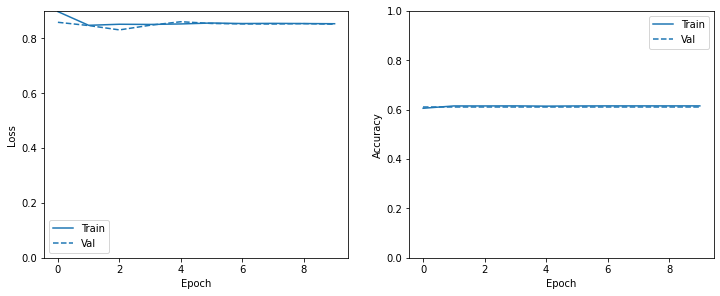

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 10ms/step
Accuracy of prediction on test set :  0.6133333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.61      1.00      0.76       736
           2       0.00      0.00      0.00       380

    accuracy                           0.61      1200
   macro avg       0.20      0.33      0.25      1200
weighted avg       0.38      0.61      0.47      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model.add(Bidirectional(SimpleRNN(100 , activation='relu',return_sequences=True)))
model.add(Bidirectional(SimpleRNN(200 , activation='relu')))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

# RNN2

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
# model.add(SimpleRNN(50 , activation='relu',return_sequences=True))
model.add(SimpleRNN(10 , activation='relu' ,return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(SimpleRNN(20 , activation='relu',return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(SimpleRNN(30 , activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Flatten())
# model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 3s 29ms/step - loss: 1.0137 - accuracy: 0.5549 - val_loss: 0.8937 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 1s 24ms/step - loss: 0.8871 - accuracy: 0.5979 - val_loss: 0.8592 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 1s 23ms/step - loss: 0.8736 - accuracy: 0.5995 - val_loss: 0.8569 - val_accuracy: 0.6083
Epoch 4/10
60/60 [==============================] - 1s 22ms/step - loss: 0.8652 - accuracy: 0.6125 - val_loss: 0.8374 - val_accuracy: 0.6083
Epoch 5/10
60/60 [==============================] - 1s 23ms/step - loss: 0.8488 - accuracy: 0.6135 - val_loss: 0.8427 - val_accuracy: 0.6083
Epoch 6/10
60/60 [==============================] - 1s 24ms/step - loss: 0.8408 - accuracy: 0.6120 - val_loss: 0.8399 - val_accuracy: 0.6083
Epoch 7/10
60/60 [==============================] - 1s 23ms/step - loss: 0.8491 - accuracy: 0.6133 - val_loss: 0.8427 - val_accuracy: 0.6083
Epoch 8/10
60

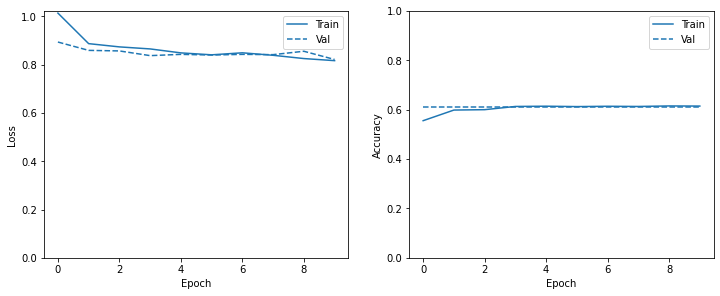

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64 )

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 6ms/step
Accuracy of prediction on test set :  0.6133333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.61      1.00      0.76       736
           2       0.00      0.00      0.00       380

    accuracy                           0.61      1200
   macro avg       0.20      0.33      0.25      1200
weighted avg       0.38      0.61      0.47      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# OOV average

In [ ]:
import re, string

# Stopwords are frequently-used words (such as “the”, “a”, “an”, “in”) that do not hold any meaning useful to extract sentiment.
# If it's your first time ever using nltk, you can download nltk's stopwords using: nltk.download('stopwords')


# A custom function defined in order to fine-tune the cleaning of the input text. This function is highly dependent on each usecase.
# Note: Only include misspelling or abbreviations of commonly used words.
#       Including many minimally present cases would negatively impact the performance. 



# This function will be our all-in-one noise removal function
def remove_noise5(tweet_tokens):

    cleaned_tokens = []

    for token in tweet_tokens:
        # token = token.lower()
        # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        token = re.sub(r'[0-9]+', '<NUMBER>', token)
        token = re.sub(r'[^\x00-\x7F]+','', token)
        token = token.replace("#", "").replace("_", " ")

        

        
        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if token not in string.punctuation :
            cleaned_tokens.append(token)
            
    return cleaned_tokens

In [ ]:
# Python program to store list to file using pickle module
import pickle

# with open('/content/gdrive/MyDrive/BSC-Project/Xtrain6', 'wb') as fp:
#         pickle.dump(X_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/Xtest6', 'wb') as fp:
#         pickle.dump(X_test, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/Ytrain6', 'wb') as fp:
#         pickle.dump(Y_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/Ytest6', 'wb') as fp:
#         pickle.dump(Y_test, fp)

with open('/content/gdrive/MyDrive/BSC-Project/Xtrain6', 'rb') as fp:
        X_train =  pickle.load(fp)
         
with open('/content/gdrive/MyDrive/BSC-Project/Xtest6', 'rb') as fp:
        X_test =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/Ytrain6', 'rb') as fp:
        Y_train =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/Ytest6', 'rb') as fp:
        Y_test =  pickle.load(fp)

In [ ]:
from nltk.tokenize import TweetTokenizer
# The reduce_len parameter will allow a maximum of 3 consecutive repeating characters, while trimming the rest
# For example, it will tranform the word: 'Helloooooooooo' to: 'Hellooo'
tk = TweetTokenizer(reduce_len=True)

data_train = []
data_test = []

In [ ]:
for x, y in zip(X_train, Y_train):
    
        data_train.append((tk.tokenize(x), y))
           
# Printing the CPU time and the first 5 elements of our 'data' list
data_train[:5]

In [ ]:
for x, y in zip(X_test, Y_test):
    
        data_test.append((tk.tokenize(x), y))
           
# Printing the CPU time and the first 5 elements of our 'data' list
data_test[:5]

In [ ]:
cleaned_tokens_list_test = []

# Removing noise from all the data
for tokens, label in data_test:
    cleaned_tokens_list_test.append((remove_noise5(tokens), label))

In [ ]:
sentences_array_train = [s[0] for s in cleaned_tokens_list_train]
sentences_train = []

for s in sentences_array_train :
  sentence_train = ' '.join(map(str ,s))
  sentences_train.append(sentence_train)

print(len(sentences_train))
print(sentences_train[0])
print(sentences_array_train[0])

In [ ]:
all_train_words = []

for s in sentences_array_train:
  for w in s :
    all_train_words.append(w)

print('All train word : {}'.format(len(all_train_words)))

unique_train_word = []

for w in all_train_words:
  if w not in unique_train_word:
    unique_train_word.append(w)
    

print('unique train word : {}'.format(len(unique_train_word)))

In [ ]:
sentences_array_test = [s[0] for s in cleaned_tokens_list_test]
sentences_test = []

for s in sentences_array_test :
  sentence_test = ' '.join(map(str ,s))
  sentences_test.append(sentence_test)

print(sentences_test[0])
print(sentences_array_test[0])

In [ ]:
all_test_words = []

for s in sentences_array_test:
  for w in s :
    all_test_words.append(w)

print('All test word : {}'.format(len(all_test_words)))

unique_test_word = []

for w in all_test_words:
  if w not in unique_test_word:
    unique_test_word.append(w)

print('unique train word : {}'.format(len(unique_test_word)))

In [ ]:
all_unique_words = []

for word in unique_train_word:
  if word not in all_unique_words :
    all_unique_words.append(word)

for word in unique_test_word:
  if word not in all_unique_words :
    all_unique_words.append(word)

print("Number of All unique word : {}".format(len(all_unique_words)))

In [ ]:
word_to_index = {}
i = 1

for word in all_unique_words :
  word_to_index[word] = i
  i+=1

word_to_index

In [ ]:
# Python program to store list to file using pickle module
import pickle

# with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'wb') as fp:
#         pickle.dump(X_padded_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'wb') as fp:
#         pickle.dump(X_padded_test, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'wb') as fp:
#         pickle.dump(Y_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'wb') as fp:
#         pickle.dump(Y_test, fp)

with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'rb') as fp:
        X_train =  pickle.load(fp)
         
with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'rb') as fp:
        X_test =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'rb') as fp:
        Y_train =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'rb') as fp:
        Y_test =  pickle.load(fp)

In [ ]:
from gensim.models import Word2Vec
w2v_model = Word2Vec.load("/content/gdrive/MyDrive/BSC-Project/w2v_300d_7.model")

In [ ]:
EMBEDDING_DIM=100

UNK = 0



for word  in unique_train_word:

      try:
           embedding_vector = w2v_model.wv[word]
           
      except :
        UNK += 1
        
        

print('OOV Train : {}'.format(UNK))

In [ ]:
EMBEDDING_DIM=100

UNK = 0


for word in unique_test_word:

      try:
           embedding_vector = w2v_model.wv[word]
           
      except :
        UNK += 1
        
       
         
print('OOV Test: {}'.format(UNK))

In [ ]:
EMBEDDING_DIM=100
embedding_matrix = np.zeros((len(word_to_index), EMBEDDING_DIM))
UNK = 0

i = 0
for word,i in word_to_index.items():

      try:
           embedding_vector = w2v_model.wv[word]
           embedding_matrix[i] = embedding_vector
      except :
        UNK+=1

avg = np.mean(embedding_matrix , axis = 0)
avg

In [ ]:
EMBEDDING_DIM=100
embedding_matrix = np.zeros((len(word_to_index)+1, EMBEDDING_DIM))
UNK = 0

i = 0
for word,i in word_to_index.items():

      try:
           embedding_vector = w2v_model.wv[word]
           embedding_matrix[i] = embedding_vector
      except :
      	   embedding_matrix[i] = avg
          #  UNK += 1
        
        
# print('Number of all unique train word = {}'.format(len(word_to_index)))       
# print('Number of OOV Train = {}'.format(UNK))    
print(embedding_matrix.shape)
print(embedding_matrix[21])

with open('/content/gdrive/MyDrive/BSC-Project/embedMatrix13', 'wb') as fp:
        pickle.dump(embedding_matrix, fp)

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/BSC-Project/embedMatrix11', 'rb') as fp:
        embedding_matrix = pickle.load(fp)

# LSTM1

In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model1.add(Dropout(rate=0.4))
model1.add(LSTM(units=128, return_sequences=False))
model1.add(Dense(units=3, activation='softmax'))
model1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 dropout_20 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_29 (LSTM)              (None, 128)               117248    
                                                                 
 dense_20 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,840,735
Trainable params: 117,635
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 9s 127ms/step - loss: 0.8853 - accuracy: 0.6057 - val_loss: 0.8811 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 7s 118ms/step - loss: 0.8518 - accuracy: 0.6146 - val_loss: 0.8521 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 7s 118ms/step - loss: 0.8499 - accuracy: 0.6148 - val_loss: 0.8472 - val_accuracy: 0.6104
Epoch 4/10
60/60 [==============================] - 7s 117ms/step - loss: 0.8489 - accuracy: 0.6135 - val_loss: 0.8445 - val_accuracy: 0.6083
Epoch 5/10
60/60 [==============================] - 7s 117ms/step - loss: 0.8355 - accuracy: 0.6141 - val_loss: 0.8258 - val_accuracy: 0.6083
Epoch 6/10
60/60 [==============================] - 7s 118ms/step - loss: 0.8177 - accuracy: 0.6148 - val_loss: 0.8061 - val_accuracy: 0.6083
Epoch 7/10
60/60 [==============================] - 7s 118ms/step - loss: 0.7972 - accuracy: 0.6148 - val_loss: 0.8105 - val_accuracy: 0.6083
Epoch 

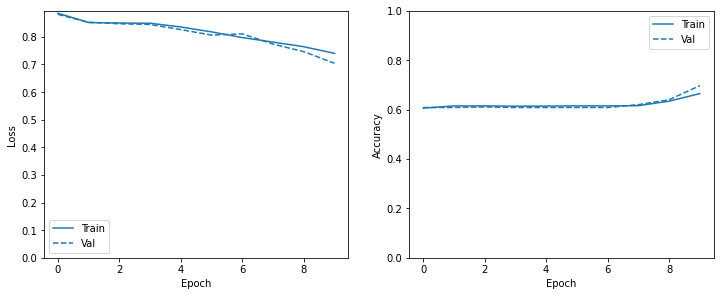

In [ ]:
model1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model1.history)
# print(model.history)

In [ ]:
prediction_prob = model1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 2s 30ms/step
Accuracy of prediction on test set :  0.7216666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.71      0.94      0.81       736
           2       0.77      0.47      0.58       380

    accuracy                           0.72      1200
   macro avg       0.49      0.47      0.46      1200
weighted avg       0.68      0.72      0.68      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model1.add(Dropout(rate=0.4))
model1.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model1.add(Dense(units=3, activation='softmax'))
model1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 dropout_21 (Dropout)        (None, 60, 100)           0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 256)              234496    
 onal)                                                           
                                                                 
 dense_21 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,958,367
Trainable params: 235,267
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 22s 325ms/step - loss: 0.8222 - accuracy: 0.6367 - val_loss: 0.7238 - val_accuracy: 0.6990
Epoch 2/10
60/60 [==============================] - 21s 360ms/step - loss: 0.7533 - accuracy: 0.6719 - val_loss: 0.7062 - val_accuracy: 0.7177
Epoch 3/10
60/60 [==============================] - 13s 213ms/step - loss: 0.7044 - accuracy: 0.6906 - val_loss: 0.6489 - val_accuracy: 0.7292
Epoch 4/10
60/60 [==============================] - 13s 213ms/step - loss: 0.6846 - accuracy: 0.7005 - val_loss: 0.6963 - val_accuracy: 0.6781
Epoch 5/10
60/60 [==============================] - 13s 213ms/step - loss: 0.6809 - accuracy: 0.7003 - val_loss: 0.6340 - val_accuracy: 0.7177
Epoch 6/10
60/60 [==============================] - 20s 338ms/step - loss: 0.6412 - accuracy: 0.7211 - val_loss: 0.6413 - val_accuracy: 0.7344
Epoch 7/10
60/60 [==============================] - 17s 286ms/step - loss: 0.6453 - accuracy: 0.7242 - val_loss: 0.6231 - val_accuracy: 0.7344

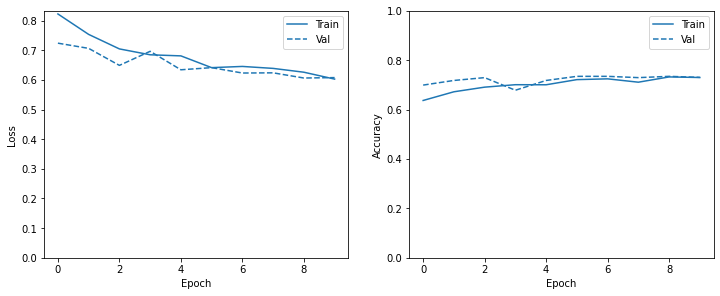

In [ ]:
model1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model1.history)
# print(model.history)

In [ ]:
prediction_prob = model1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 3s 52ms/step
Accuracy of prediction on test set :  0.7316666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.73      0.91      0.81       736
           2       0.74      0.56      0.63       380

    accuracy                           0.73      1200
   macro avg       0.49      0.49      0.48      1200
weighted avg       0.68      0.73      0.70      1200



# LSTM2

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dropout(rate=0.3))
model2.add(Dense(units=3, activation='softmax'))
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 lstm_20 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 153       
                                                                 
Total params: 1,753,453
Trainable params: 30,353
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 9s 111ms/step - loss: 0.9104 - accuracy: 0.6060 - val_loss: 0.8567 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 4s 68ms/step - loss: 0.8542 - accuracy: 0.6102 - val_loss: 0.8254 - val_accuracy: 0.6104
Epoch 3/10
60/60 [==============================] - 4s 60ms/step - loss: 0.8190 - accuracy: 0.6120 - val_loss: 0.8132 - val_accuracy: 0.6062
Epoch 4/10
60/60 [==============================] - 3s 48ms/step - loss: 0.8027 - accuracy: 0.6133 - val_loss: 0.7724 - val_accuracy: 0.6125
Epoch 5/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7623 - accuracy: 0.6440 - val_loss: 0.7715 - val_accuracy: 0.6427
Epoch 6/10
60/60 [==============================] - 2s 33ms/step - loss: 0.7364 - accuracy: 0.6852 - val_loss: 0.7041 - val_accuracy: 0.7073
Epoch 7/10
60/60 [==============================] - 2s 33ms/step - loss: 0.7009 - accuracy: 0.7068 - val_loss: 0.6924 - val_accuracy: 0.7042
Epoch 8/10
6

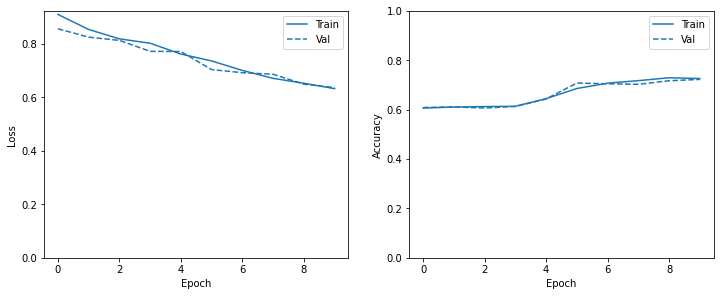

In [ ]:
model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model2.history)
# print(model.history)

In [ ]:
prediction_prob = model2.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 9ms/step
Accuracy of prediction on test set :  0.7266666666666667
              precision    recall  f1-score   support

           0       0.29      0.05      0.08        84
           1       0.73      0.89      0.80       736
           2       0.73      0.56      0.63       380

    accuracy                           0.73      1200
   macro avg       0.58      0.50      0.51      1200
weighted avg       0.70      0.73      0.70      1200



In [ ]:
model2.save('/content/gdrive/MyDrive/BSC-Project/saved_model/lstm2_avg.h5')

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model2.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model2.add(Dropout(rate=0.3))
model2.add(Dense(units=3, activation='softmax'))
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_11 (Bidirecti  (None, 100)              60400     
 onal)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,783,803
Trainable params: 60,703
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 75ms/step - loss: 0.8465 - accuracy: 0.6091 - val_loss: 0.7636 - val_accuracy: 0.6896
Epoch 2/10
60/60 [==============================] - 4s 60ms/step - loss: 0.7318 - accuracy: 0.6831 - val_loss: 0.6792 - val_accuracy: 0.7229
Epoch 3/10
60/60 [==============================] - 4s 60ms/step - loss: 0.6726 - accuracy: 0.7133 - val_loss: 0.6528 - val_accuracy: 0.7260
Epoch 4/10
60/60 [==============================] - 4s 71ms/step - loss: 0.6496 - accuracy: 0.7201 - val_loss: 0.6330 - val_accuracy: 0.7385
Epoch 5/10
60/60 [==============================] - 5s 80ms/step - loss: 0.6272 - accuracy: 0.7206 - val_loss: 0.6512 - val_accuracy: 0.7135
Epoch 6/10
60/60 [==============================] - 4s 61ms/step - loss: 0.6197 - accuracy: 0.7279 - val_loss: 0.6148 - val_accuracy: 0.7240
Epoch 7/10
60/60 [==============================] - 4s 61ms/step - loss: 0.6038 - accuracy: 0.7383 - val_loss: 0.6241 - val_accuracy: 0.7281
Epoch 8/10
60

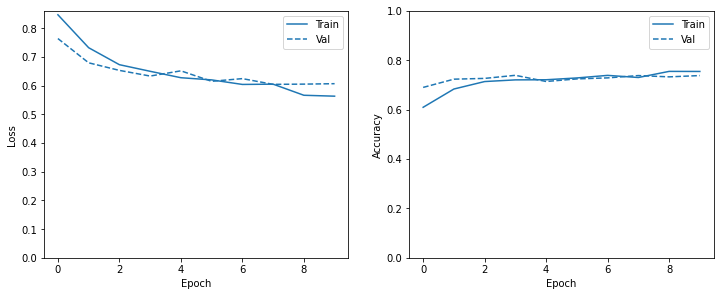

In [ ]:
model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model2.history)
# print(model.history)

In [ ]:
prediction_prob = model2.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 14ms/step
Accuracy of prediction on test set :  0.7358333333333333
              precision    recall  f1-score   support

           0       0.43      0.07      0.12        84
           1       0.76      0.86      0.81       736
           2       0.69      0.64      0.67       380

    accuracy                           0.74      1200
   macro avg       0.63      0.52      0.53      1200
weighted avg       0.72      0.74      0.71      1200



In [ ]:
model2.save('/content/gdrive/MyDrive/BSC-Project/saved_model/bilstm2_avg.h5')

# LSTM3

In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model3.add(LSTM(units=100, return_sequences=True))
model3.add(LSTM(units=200, return_sequences=False))
model3.add(Dropout(rate=0.3))
model3.add(Dense(units=3, activation='softmax'))
model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 lstm_21 (LSTM)              (None, 60, 100)           80400     
                                                                 
 lstm_22 (LSTM)              (None, 200)               240800    
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 603       
                                                                 
Total params: 2,044,903
Trainable params: 321,803
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 26s 355ms/step - loss: 0.8726 - accuracy: 0.6107 - val_loss: 0.8608 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 18s 300ms/step - loss: 0.8413 - accuracy: 0.6099 - val_loss: 0.8117 - val_accuracy: 0.6094
Epoch 3/10
60/60 [==============================] - 18s 300ms/step - loss: 0.7723 - accuracy: 0.6474 - val_loss: 0.7508 - val_accuracy: 0.6979
Epoch 4/10
60/60 [==============================] - 18s 300ms/step - loss: 0.7242 - accuracy: 0.7010 - val_loss: 0.7032 - val_accuracy: 0.7094
Epoch 5/10
60/60 [==============================] - 20s 336ms/step - loss: 0.7069 - accuracy: 0.7013 - val_loss: 0.6891 - val_accuracy: 0.7042
Epoch 6/10
60/60 [==============================] - 18s 299ms/step - loss: 0.6805 - accuracy: 0.7214 - val_loss: 0.6700 - val_accuracy: 0.7073
Epoch 7/10
60/60 [==============================] - 31s 521ms/step - loss: 0.6624 - accuracy: 0.7206 - val_loss: 0.6876 - val_accuracy: 0.6906

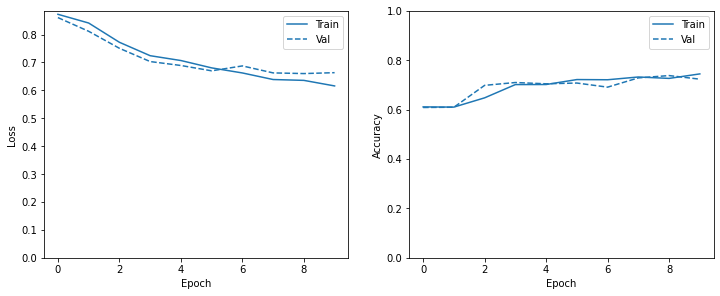

In [ ]:
model3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model3.history)
# print(model.history)

In [ ]:
prediction_prob = model3.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 3s 68ms/step
Accuracy of prediction on test set :  0.7391666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.74      0.90      0.81       736
           2       0.74      0.59      0.66       380

    accuracy                           0.74      1200
   macro avg       0.49      0.50      0.49      1200
weighted avg       0.69      0.74      0.71      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model3.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model3.add(Bidirectional(LSTM(units=200, return_sequences=False)))
model3.add(Dropout(rate=0.3))
model3.add(Dense(units=3, activation='softmax'))
model3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_12 (Bidirecti  (None, 60, 200)          160800    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 400)              641600    
 onal)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 400)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 1203      
                                                                 
Total params: 2,526,703
Trainable params: 803,603
Non

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 61s 931ms/step - loss: 0.8000 - accuracy: 0.6365 - val_loss: 0.7530 - val_accuracy: 0.6615
Epoch 2/10
60/60 [==============================] - 44s 725ms/step - loss: 0.6924 - accuracy: 0.6979 - val_loss: 0.6495 - val_accuracy: 0.7198
Epoch 3/10
60/60 [==============================] - 43s 718ms/step - loss: 0.6474 - accuracy: 0.7174 - val_loss: 0.6255 - val_accuracy: 0.7208
Epoch 4/10
60/60 [==============================] - 40s 669ms/step - loss: 0.6336 - accuracy: 0.7310 - val_loss: 0.6608 - val_accuracy: 0.7042
Epoch 5/10
60/60 [==============================] - 49s 824ms/step - loss: 0.6041 - accuracy: 0.7352 - val_loss: 0.6301 - val_accuracy: 0.7198
Epoch 6/10
60/60 [==============================] - 50s 843ms/step - loss: 0.6012 - accuracy: 0.7393 - val_loss: 0.6226 - val_accuracy: 0.7354
Epoch 7/10
60/60 [==============================] - 53s 890ms/step - loss: 0.5759 - accuracy: 0.7503 - val_loss: 0.6019 - val_accuracy: 0.7417

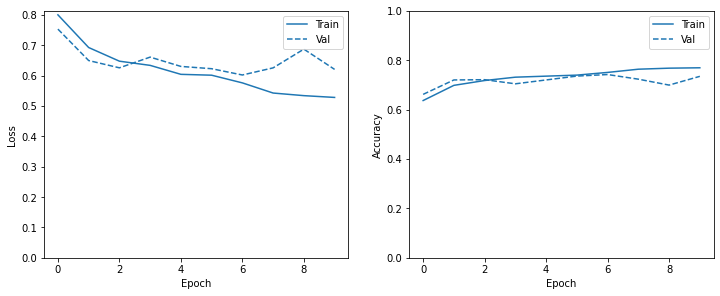

In [ ]:
model3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model3.history)
# print(model.history)

In [ ]:
prediction_prob = model3.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 6s 124ms/step
Accuracy of prediction on test set :  0.7433333333333333
              precision    recall  f1-score   support

           0       0.48      0.26      0.34        84
           1       0.76      0.88      0.81       736
           2       0.74      0.59      0.65       380

    accuracy                           0.74      1200
   macro avg       0.66      0.58      0.60      1200
weighted avg       0.73      0.74      0.73      1200



# LSTM4

In [ ]:
model4 = Sequential()
model4.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model4.add(LSTM(units=10, return_sequences=True))
model4.add(LSTM(units=20, return_sequences=True))
model4.add(LSTM(units=30, return_sequences=False))
model4.add(Dropout(rate=0.3))
model4.add(Dense(units=3, activation='softmax'))
model4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 lstm_23 (LSTM)              (None, 60, 10)            4440      
                                                                 
 lstm_24 (LSTM)              (None, 60, 20)            2480      
                                                                 
 lstm_25 (LSTM)              (None, 30)                6120      
                                                                 
 dropout_16 (Dropout)        (None, 30)                0         
                                                                 
 dense_16 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,736,233
Trainable params: 13,133
Non-

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 9s 75ms/step - loss: 0.9241 - accuracy: 0.6073 - val_loss: 0.8404 - val_accuracy: 0.6062
Epoch 2/10
60/60 [==============================] - 3s 54ms/step - loss: 0.8379 - accuracy: 0.6096 - val_loss: 0.8098 - val_accuracy: 0.6135
Epoch 3/10
60/60 [==============================] - 3s 54ms/step - loss: 0.7980 - accuracy: 0.6125 - val_loss: 0.7909 - val_accuracy: 0.6156
Epoch 4/10
60/60 [==============================] - 3s 56ms/step - loss: 0.7769 - accuracy: 0.6167 - val_loss: 0.7803 - val_accuracy: 0.6187
Epoch 5/10
60/60 [==============================] - 3s 55ms/step - loss: 0.7627 - accuracy: 0.6359 - val_loss: 0.7654 - val_accuracy: 0.6531
Epoch 6/10
60/60 [==============================] - 3s 55ms/step - loss: 0.7474 - accuracy: 0.6604 - val_loss: 0.7614 - val_accuracy: 0.6656
Epoch 7/10
60/60 [==============================] - 3s 55ms/step - loss: 0.7398 - accuracy: 0.6784 - val_loss: 0.7464 - val_accuracy: 0.6760
Epoch 8/10
60

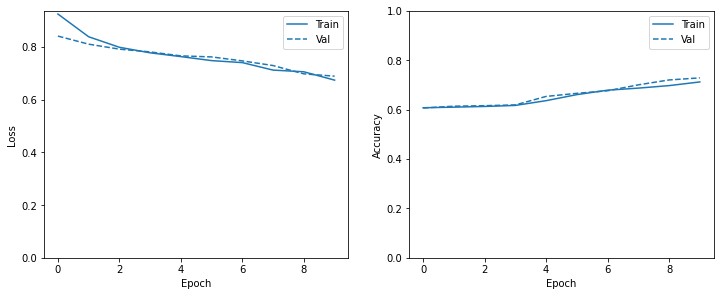

In [ ]:
model4.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model4.history)
# print(model.history)

In [ ]:
prediction_prob = model4.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 2s 15ms/step
Accuracy of prediction on test set :  0.7116666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.76      0.84      0.80       736
           2       0.61      0.62      0.62       380

    accuracy                           0.71      1200
   macro avg       0.46      0.49      0.47      1200
weighted avg       0.66      0.71      0.68      1200



In [ ]:
model4 = Sequential()
model4.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model4.add(Bidirectional(LSTM(units=10, return_sequences=True)))
model4.add(Bidirectional(LSTM(units=20, return_sequences=True)))
model4.add(Bidirectional(LSTM(units=30, return_sequences=False)))
model4.add(Dropout(rate=0.3))
model4.add(Dense(units=3, activation='softmax'))
model4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_14 (Bidirecti  (None, 60, 20)           8880      
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 60, 40)           6560      
 onal)                                                           
                                                                 
 bidirectional_16 (Bidirecti  (None, 60)               17040     
 onal)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 60)                0         
                                                     

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 17s 134ms/step - loss: 0.8643 - accuracy: 0.6104 - val_loss: 0.7988 - val_accuracy: 0.6656
Epoch 2/10
60/60 [==============================] - 6s 96ms/step - loss: 0.7596 - accuracy: 0.6823 - val_loss: 0.7165 - val_accuracy: 0.7031
Epoch 3/10
60/60 [==============================] - 6s 95ms/step - loss: 0.6979 - accuracy: 0.7078 - val_loss: 0.6984 - val_accuracy: 0.7073
Epoch 4/10
60/60 [==============================] - 6s 96ms/step - loss: 0.6718 - accuracy: 0.7120 - val_loss: 0.6504 - val_accuracy: 0.7208
Epoch 5/10
60/60 [==============================] - 6s 95ms/step - loss: 0.6397 - accuracy: 0.7271 - val_loss: 0.6450 - val_accuracy: 0.7271
Epoch 6/10
60/60 [==============================] - 6s 95ms/step - loss: 0.6301 - accuracy: 0.7253 - val_loss: 0.6594 - val_accuracy: 0.7198
Epoch 7/10
60/60 [==============================] - 6s 95ms/step - loss: 0.6283 - accuracy: 0.7326 - val_loss: 0.6481 - val_accuracy: 0.7188
Epoch 8/10


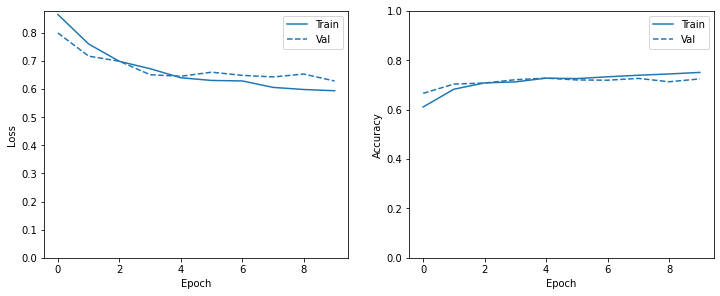

In [ ]:
model4.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model4.history)
# print(model.history)

In [ ]:
prediction_prob = model4.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 4s 23ms/step
Accuracy of prediction on test set :  0.7333333333333333
              precision    recall  f1-score   support

           0       0.38      0.13      0.19        84
           1       0.74      0.90      0.81       736
           2       0.77      0.53      0.63       380

    accuracy                           0.73      1200
   macro avg       0.63      0.52      0.55      1200
weighted avg       0.72      0.73      0.71      1200



# LSTM5

In [ ]:
model5 = Sequential()
model5.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model5.add(LSTM(units=50, return_sequences=False))
model5.add(Dropout(rate=0.4))
model5.add(Dense(units=3, activation='softmax'))
model5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 lstm_27 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 3)                 153       
                                                                 
Total params: 1,753,453
Trainable params: 30,353
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model5.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 43ms/step - loss: 0.9237 - accuracy: 0.6010 - val_loss: 0.8498 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 2s 35ms/step - loss: 0.8568 - accuracy: 0.6130 - val_loss: 0.8515 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 2s 35ms/step - loss: 0.8283 - accuracy: 0.6130 - val_loss: 0.8015 - val_accuracy: 0.6083
Epoch 4/10
60/60 [==============================] - 2s 35ms/step - loss: 0.8014 - accuracy: 0.6128 - val_loss: 0.7857 - val_accuracy: 0.6094
Epoch 5/10
60/60 [==============================] - 2s 35ms/step - loss: 0.7741 - accuracy: 0.6180 - val_loss: 0.7922 - val_accuracy: 0.6333
Epoch 6/10
60/60 [==============================] - 2s 35ms/step - loss: 0.7508 - accuracy: 0.6523 - val_loss: 0.7233 - val_accuracy: 0.6750
Epoch 7/10
60/60 [==============================] - 2s 35ms/step - loss: 0.7346 - accuracy: 0.6760 - val_loss: 0.6974 - val_accuracy: 0.6917
Epoch 8/10
60

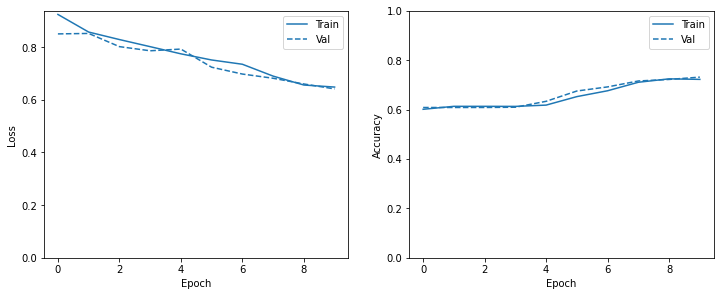

In [ ]:
model5.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model5.history)
# print(model.history)

In [ ]:
prediction_prob = model5.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 10ms/step
Accuracy of prediction on test set :  0.7258333333333333
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        84
           1       0.77      0.84      0.81       736
           2       0.67      0.64      0.66       380

    accuracy                           0.73      1200
   macro avg       0.57      0.53      0.54      1200
weighted avg       0.71      0.73      0.71      1200



In [ ]:
model5 = Sequential()
model5.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model5.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model5.add(Dropout(rate=0.4))
model5.add(Dense(units=3, activation='softmax'))
model5.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_17 (Bidirecti  (None, 100)              60400     
 onal)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,783,803
Trainable params: 60,703
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model5.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 74ms/step - loss: 0.8505 - accuracy: 0.6138 - val_loss: 0.7772 - val_accuracy: 0.6573
Epoch 2/10
60/60 [==============================] - 4s 60ms/step - loss: 0.7476 - accuracy: 0.6747 - val_loss: 0.6977 - val_accuracy: 0.7250
Epoch 3/10
60/60 [==============================] - 4s 61ms/step - loss: 0.6978 - accuracy: 0.7029 - val_loss: 0.6473 - val_accuracy: 0.7396
Epoch 4/10
60/60 [==============================] - 4s 60ms/step - loss: 0.6541 - accuracy: 0.7135 - val_loss: 0.6518 - val_accuracy: 0.7115
Epoch 5/10
60/60 [==============================] - 4s 61ms/step - loss: 0.6393 - accuracy: 0.7148 - val_loss: 0.6263 - val_accuracy: 0.7094
Epoch 6/10
60/60 [==============================] - 4s 61ms/step - loss: 0.6271 - accuracy: 0.7232 - val_loss: 0.6233 - val_accuracy: 0.7250
Epoch 7/10
60/60 [==============================] - 4s 61ms/step - loss: 0.6105 - accuracy: 0.7385 - val_loss: 0.6155 - val_accuracy: 0.7219
Epoch 8/10
60

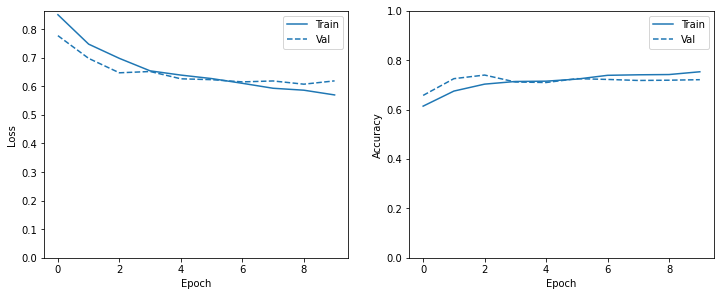

In [ ]:
model5.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model5.history)
# print(model.history)

In [ ]:
prediction_prob = model5.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 14ms/step
Accuracy of prediction on test set :  0.7291666666666666
              precision    recall  f1-score   support

           0       0.47      0.08      0.14        84
           1       0.75      0.86      0.80       736
           2       0.69      0.62      0.65       380

    accuracy                           0.73      1200
   macro avg       0.64      0.52      0.53      1200
weighted avg       0.71      0.73      0.71      1200



# LSTM6

In [ ]:
model6 = Sequential()
model6.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model6.add(LSTM(units=100, return_sequences=False))
model6.add(Dropout(rate=0.3))
model6.add(Dense(units=3, activation='softmax'))
model6.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 lstm_28 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,803,803
Trainable params: 80,703
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model6.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 7s 98ms/step - loss: 0.8954 - accuracy: 0.6055 - val_loss: 0.8541 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 5s 90ms/step - loss: 0.8527 - accuracy: 0.6125 - val_loss: 0.8139 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 5s 89ms/step - loss: 0.8197 - accuracy: 0.6148 - val_loss: 0.7794 - val_accuracy: 0.6177
Epoch 4/10
60/60 [==============================] - 5s 89ms/step - loss: 0.7939 - accuracy: 0.6292 - val_loss: 0.8519 - val_accuracy: 0.5156
Epoch 5/10
60/60 [==============================] - 7s 124ms/step - loss: 0.7775 - accuracy: 0.6326 - val_loss: 0.7556 - val_accuracy: 0.6760
Epoch 6/10
60/60 [==============================] - 5s 89ms/step - loss: 0.7264 - accuracy: 0.6966 - val_loss: 0.7104 - val_accuracy: 0.7240
Epoch 7/10
60/60 [==============================] - 5s 89ms/step - loss: 0.6902 - accuracy: 0.7156 - val_loss: 0.6827 - val_accuracy: 0.7250
Epoch 8/10
6

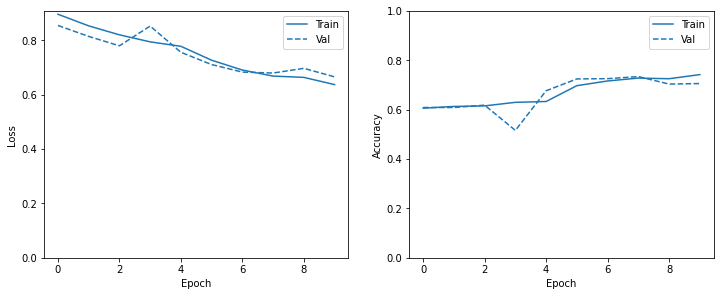

In [ ]:
model6.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model6.history)
# print(model.history)

In [ ]:
prediction_prob = model6.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 16ms/step
Accuracy of prediction on test set :  0.725
              precision    recall  f1-score   support

           0       0.24      0.08      0.12        84
           1       0.73      0.90      0.80       736
           2       0.77      0.52      0.62       380

    accuracy                           0.73      1200
   macro avg       0.58      0.50      0.52      1200
weighted avg       0.71      0.72      0.70      1200



In [ ]:
model6 = Sequential()
model6.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model6.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model6.add(Dropout(rate=0.3))
model6.add(Dense(units=3, activation='softmax'))
model6.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 60, 100)           1723100   
                                                                 
 bidirectional_18 (Bidirecti  (None, 200)              160800    
 onal)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 3)                 603       
                                                                 
Total params: 1,884,503
Trainable params: 161,403
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model6.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 13s 174ms/step - loss: 0.8065 - accuracy: 0.6417 - val_loss: 0.7093 - val_accuracy: 0.7125
Epoch 2/10
60/60 [==============================] - 10s 159ms/step - loss: 0.7052 - accuracy: 0.7036 - val_loss: 0.6740 - val_accuracy: 0.7312
Epoch 3/10
60/60 [==============================] - 10s 159ms/step - loss: 0.6597 - accuracy: 0.7167 - val_loss: 0.6578 - val_accuracy: 0.7208
Epoch 4/10
60/60 [==============================] - 12s 194ms/step - loss: 0.6362 - accuracy: 0.7214 - val_loss: 0.6207 - val_accuracy: 0.7271
Epoch 5/10
60/60 [==============================] - 10s 160ms/step - loss: 0.6119 - accuracy: 0.7284 - val_loss: 0.6373 - val_accuracy: 0.7208
Epoch 6/10
60/60 [==============================] - 10s 159ms/step - loss: 0.6036 - accuracy: 0.7362 - val_loss: 0.6372 - val_accuracy: 0.7125
Epoch 7/10
60/60 [==============================] - 10s 160ms/step - loss: 0.5972 - accuracy: 0.7422 - val_loss: 0.6337 - val_accuracy: 0.7146

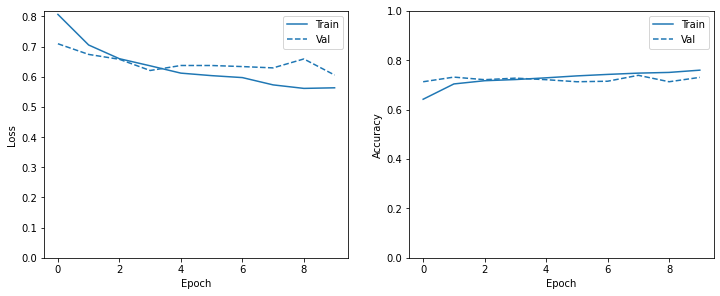

In [ ]:
model6.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model6.history)
# print(model.history)

In [ ]:
prediction_prob = model6.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 2s 23ms/step
Accuracy of prediction on test set :  0.725
              precision    recall  f1-score   support

           0       0.38      0.19      0.25        84
           1       0.77      0.83      0.80       736
           2       0.68      0.64      0.66       380

    accuracy                           0.73      1200
   macro avg       0.61      0.55      0.57      1200
weighted avg       0.71      0.72      0.71      1200



# RNN1

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(10 , activation='relu',return_sequences=True))
model.add(SimpleRNN(20 , activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 4s 33ms/step - loss: 1.0156 - accuracy: 0.6039 - val_loss: 0.9119 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 2s 27ms/step - loss: 0.8888 - accuracy: 0.6130 - val_loss: 0.8523 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 2s 26ms/step - loss: 0.8678 - accuracy: 0.6115 - val_loss: 0.8473 - val_accuracy: 0.6083
Epoch 4/10
60/60 [==============================] - 2s 26ms/step - loss: 0.8629 - accuracy: 0.6125 - val_loss: 0.8438 - val_accuracy: 0.6083
Epoch 5/10
60/60 [==============================] - 2s 26ms/step - loss: 0.8552 - accuracy: 0.6146 - val_loss: 0.8514 - val_accuracy: 0.6083
Epoch 6/10
60/60 [==============================] - 2s 26ms/step - loss: 0.8306 - accuracy: 0.6120 - val_loss: 0.8238 - val_accuracy: 0.6083
Epoch 7/10
60/60 [==============================] - 2s 27ms/step - loss: 0.8317 - accuracy: 0.6151 - val_loss: 0.8260 - val_accuracy: 0.6083
Epoch 8/10
60

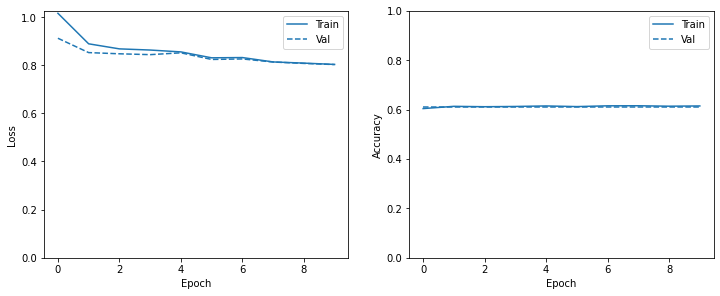

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 7ms/step
Accuracy of prediction on test set :  0.6125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.61      1.00      0.76       736
           2       0.00      0.00      0.00       380

    accuracy                           0.61      1200
   macro avg       0.20      0.33      0.25      1200
weighted avg       0.38      0.61      0.47      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(SimpleRNN(10 , activation='relu',return_sequences=True)))
model.add(Bidirectional(SimpleRNN(20 , activation='relu')))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 6s 52ms/step - loss: 0.8939 - accuracy: 0.5880 - val_loss: 0.8361 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 3s 42ms/step - loss: 0.8470 - accuracy: 0.6122 - val_loss: 0.8184 - val_accuracy: 0.6156
Epoch 3/10
60/60 [==============================] - 3s 43ms/step - loss: 0.8266 - accuracy: 0.6276 - val_loss: 0.8047 - val_accuracy: 0.6438
Epoch 4/10
60/60 [==============================] - 2s 42ms/step - loss: 0.8178 - accuracy: 0.6328 - val_loss: 0.7865 - val_accuracy: 0.6448
Epoch 5/10
60/60 [==============================] - 3s 42ms/step - loss: 0.7848 - accuracy: 0.6555 - val_loss: 0.7612 - val_accuracy: 0.6750
Epoch 6/10
60/60 [==============================] - 3s 42ms/step - loss: 0.7630 - accuracy: 0.6703 - val_loss: 0.7391 - val_accuracy: 0.7063
Epoch 7/10
60/60 [==============================] - 3s 43ms/step - loss: 0.7442 - accuracy: 0.6826 - val_loss: 0.7142 - val_accuracy: 0.7083
Epoch 8/10
60

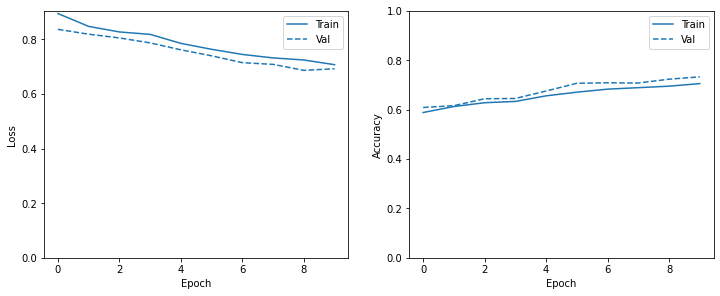

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 12ms/step
Accuracy of prediction on test set :  0.7191666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.76      0.85      0.80       736
           2       0.64      0.63      0.63       380

    accuracy                           0.72      1200
   macro avg       0.46      0.49      0.48      1200
weighted avg       0.67      0.72      0.69      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN2

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
# model.add(SimpleRNN(50 , activation='relu',return_sequences=True))
model.add(SimpleRNN(10 , activation='relu' ,return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(SimpleRNN(20 , activation='relu',return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(SimpleRNN(30 , activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Flatten())
# model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 5s 44ms/step - loss: 0.9456 - accuracy: 0.5703 - val_loss: 0.8562 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 4s 63ms/step - loss: 0.8795 - accuracy: 0.6073 - val_loss: 0.8490 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 2s 39ms/step - loss: 0.8705 - accuracy: 0.6109 - val_loss: 0.8493 - val_accuracy: 0.6083
Epoch 4/10
60/60 [==============================] - 2s 35ms/step - loss: 0.8754 - accuracy: 0.6125 - val_loss: 0.8522 - val_accuracy: 0.6083
Epoch 5/10
60/60 [==============================] - 2s 36ms/step - loss: 0.8651 - accuracy: 0.6148 - val_loss: 0.8501 - val_accuracy: 0.6083
Epoch 6/10
60/60 [==============================] - 2s 35ms/step - loss: 0.8643 - accuracy: 0.6151 - val_loss: 0.8484 - val_accuracy: 0.6083
Epoch 7/10
60/60 [==============================] - 2s 36ms/step - loss: 0.8591 - accuracy: 0.6148 - val_loss: 0.8662 - val_accuracy: 0.6083
Epoch 8/10
60

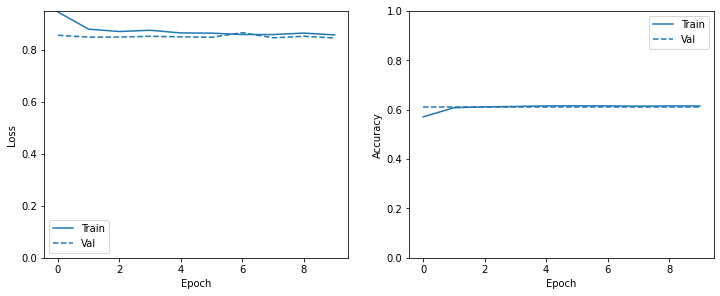

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 10ms/step
Accuracy of prediction on test set :  0.6133333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.61      1.00      0.76       736
           2       0.00      0.00      0.00       380

    accuracy                           0.61      1200
   macro avg       0.20      0.33      0.25      1200
weighted avg       0.38      0.61      0.47      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
# model.add(SimpleRNN(50 , activation='relu',return_sequences=True))
model.add(Bidirectional(SimpleRNN(10 , activation='relu' ,return_sequences=True)))
model.add(Dropout(rate=0.5))
model.add((SimpleRNN(20 , activation='relu',return_sequences=True)))
model.add(Dropout(rate=0.5))
model.add(Bidirectional(SimpleRNN(30 , activation='relu')))
model.add(Dropout(rate=0.4))
model.add(Flatten())
# model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

60/60 [==============================] - 8s 65ms/step - loss: 0.9656 - accuracy: 0.5578 - val_loss: 0.8617 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 3s 52ms/step - loss: 0.8821 - accuracy: 0.6068 - val_loss: 0.8501 - val_accuracy: 0.6083
Epoch 3/10
60/60 [==============================] - 3s 52ms/step - loss: 0.8641 - accuracy: 0.6128 - val_loss: 0.8464 - val_accuracy: 0.6083
Epoch 4/10
60/60 [==============================] - 3s 53ms/step - loss: 0.8585 - accuracy: 0.6148 - val_loss: 0.8457 - val_accuracy: 0.6083
Epoch 5/10
60/60 [==============================] - 3s 51ms/step - loss: 0.8514 - accuracy: 0.6135 - val_loss: 0.8496 - val_accuracy: 0.6083
Epoch 6/10
60/60 [==============================] - 3s 52ms/step - loss: 0.8473 - accuracy: 0.6130 - val_loss: 0.8323 - val_accuracy: 0.6083
Epoch 7/10
60/60 [==============================] - 3s 53ms/step - loss: 0.8323 - accuracy: 0.6133 - val_loss: 0.8448 - val_accuracy: 0.6083
Epoch 8/10
60/60 [======

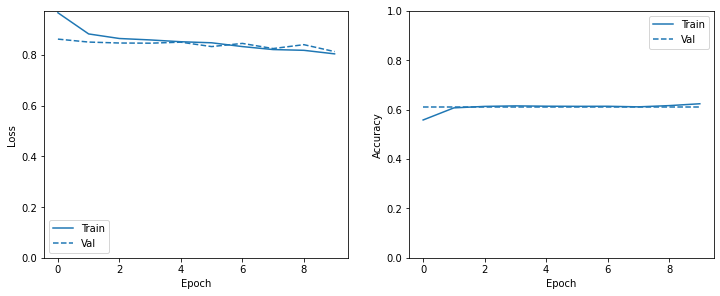

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)
# print(model.history)

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 1s 14ms/step
Accuracy of prediction on test set :  0.6133333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.61      1.00      0.76       736
           2       0.00      0.00      0.00       380

    accuracy                           0.61      1200
   macro avg       0.20      0.33      0.25      1200
weighted avg       0.38      0.61      0.47      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feed Forward (OOV-Zero)

In [ ]:
# Python program to store list to file using pickle module
import pickle

# with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'wb') as fp:
#         pickle.dump(X_padded_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'wb') as fp:
#         pickle.dump(X_padded_test, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'wb') as fp:
#         pickle.dump(Y_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'wb') as fp:
#         pickle.dump(Y_test, fp)

with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'rb') as fp:
        X_train =  pickle.load(fp)
         
with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'rb') as fp:
        X_test =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'rb') as fp:
        Y_train =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'rb') as fp:
        Y_test =  pickle.load(fp)

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/BSC-Project/embedMatrix12', 'rb') as fp:
        embedding_matrix = pickle.load(fp)

# FF1

In [ ]:
model1_1 = Sequential()
model1_1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model1_1.add(Lambda(lambda x: backend.mean(x, axis=1)))
model1_1.add(Dense(150, input_dim=embedding_matrix.shape[0], activation='relu'))
model1_1.add(Dense(3, activation='softmax'))
model1_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lambda_1 (Lambda)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 3)                 453       
                                                                 
Total params: 1,738,703
Trainable params: 15,603
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model1_1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 0.8978 - accuracy: 0.6107 - val_loss: 0.8455 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8108 - accuracy: 0.6352 - val_loss: 0.7973 - val_accuracy: 0.6156
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.6544 - val_loss: 0.7525 - val_accuracy: 0.6917
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.6794 - val_loss: 0.7226 - val_accuracy: 0.6896
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.6909 - val_loss: 0.7023 - val_accuracy: 0.7240
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.6997 - val_loss: 0.6893 - val_accuracy: 0.7031
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.7076 - val_loss: 0.6708 - val_accuracy: 0.7281
Epoch 8/10
60/60 [==

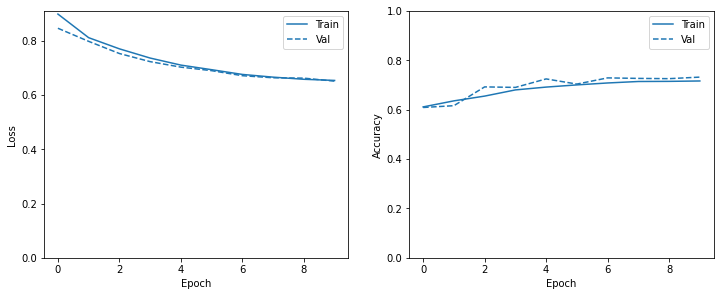

In [ ]:
model1_1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model1_1.history)
# print(model.history)

In [ ]:
prediction_prob = model1_1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 0s 1ms/step
Accuracy of prediction on test set :  0.7241666666666666
              precision    recall  f1-score   support

           0       0.14      0.01      0.02        84
           1       0.73      0.90      0.81       736
           2       0.71      0.55      0.62       380

    accuracy                           0.72      1200
   macro avg       0.53      0.49      0.48      1200
weighted avg       0.69      0.72      0.69      1200



# FF2

In [ ]:
model2_1 = Sequential()
model2_1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model2_1.add(Lambda(lambda x: backend.mean(x, axis=1)))
model2_1.add(Dense(110, input_dim=embedding_matrix.shape[0], activation='relu'))
model2_1.add(Dense(120, input_dim=embedding_matrix.shape[0], activation='relu'))
model2_1.add(Dense(130, input_dim=embedding_matrix.shape[0], activation='relu'))
model2_1.add(Dense(3, activation='softmax'))
model2_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lambda_2 (Lambda)           (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 110)               11110     
                                                                 
 dense_11 (Dense)            (None, 120)               13320     
                                                                 
 dense_12 (Dense)            (None, 130)               15730     
                                                                 
 dense_13 (Dense)            (None, 3)                 393       
                                                                 
Total params: 1,763,653
Trainable params: 40,553
Non-t

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model2_1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 0.8721 - accuracy: 0.6078 - val_loss: 0.7962 - val_accuracy: 0.6187
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7504 - accuracy: 0.6664 - val_loss: 0.7208 - val_accuracy: 0.6760
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.7104 - val_loss: 0.6826 - val_accuracy: 0.6990
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.7135 - val_loss: 0.6442 - val_accuracy: 0.7229
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.7174 - val_loss: 0.6363 - val_accuracy: 0.7240
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.7224 - val_loss: 0.6252 - val_accuracy: 0.7198
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.7268 - val_loss: 0.6367 - val_accuracy: 0.7208
Epoch 8/10
60/60 [==

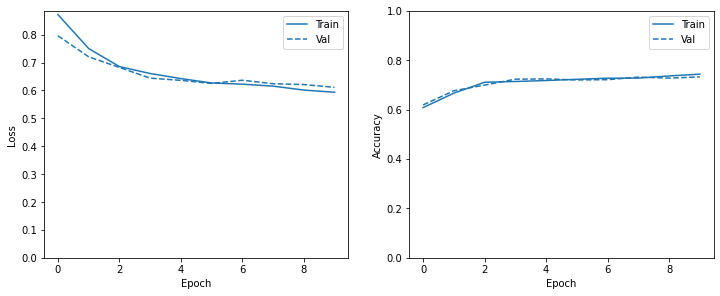

In [ ]:
model2_1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model2_1.history)
# print(model.history)

In [ ]:
prediction_prob = model2_1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 0s 1ms/step
Accuracy of prediction on test set :  0.7291666666666666
              precision    recall  f1-score   support

           0       0.33      0.02      0.04        84
           1       0.75      0.89      0.81       736
           2       0.69      0.58      0.63       380

    accuracy                           0.73      1200
   macro avg       0.59      0.50      0.50      1200
weighted avg       0.70      0.73      0.70      1200



In [ ]:
model2_1.save('/content/gdrive/MyDrive/BSC-Project/saved_model/ff2_1_new')

# FF3

In [ ]:
model3_1 = Sequential()
model3_1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model3_1.add(Lambda(lambda x: backend.mean(x, axis=1)))
model3_1.add(Dense(200, input_dim=embedding_matrix.shape[0], activation='relu'))
model3_1.add(Dense(3, activation='softmax'))
model3_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lambda_3 (Lambda)           (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 200)               20200     
                                                                 
 dense_15 (Dense)            (None, 3)                 603       
                                                                 
Total params: 1,743,903
Trainable params: 20,803
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model3_1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 0.8878 - accuracy: 0.6073 - val_loss: 0.8324 - val_accuracy: 0.6208
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8031 - accuracy: 0.6346 - val_loss: 0.7804 - val_accuracy: 0.6646
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.6599 - val_loss: 0.7408 - val_accuracy: 0.6677
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.6755 - val_loss: 0.7129 - val_accuracy: 0.7146
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.6979 - val_loss: 0.6908 - val_accuracy: 0.7219
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.7091 - val_loss: 0.6845 - val_accuracy: 0.7083
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.7099 - val_loss: 0.6656 - val_accuracy: 0.7271
Epoch 8/10
60/60 [==

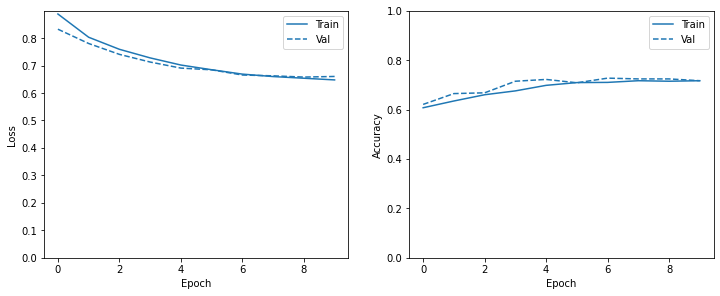

In [ ]:
model3_1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model3_1.history)
# print(model.history)

In [ ]:
prediction_prob = model3_1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 0s 2ms/step
Accuracy of prediction on test set :  0.7083333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.76      0.81      0.79       736
           2       0.61      0.66      0.63       380

    accuracy                           0.71      1200
   macro avg       0.46      0.49      0.47      1200
weighted avg       0.66      0.71      0.68      1200



In [ ]:
model3.save('/content/gdrive/MyDrive/BSC-Project/saved_model/ff3_oov0.h5')

# Feed Forward (OOV Average)

In [ ]:
# Python program to store list to file using pickle module
import pickle

# with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'wb') as fp:
#         pickle.dump(X_padded_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'wb') as fp:
#         pickle.dump(X_padded_test, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'wb') as fp:
#         pickle.dump(Y_train, fp)

# with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'wb') as fp:
#         pickle.dump(Y_test, fp)

with open('/content/gdrive/MyDrive/BSC-Project/XtrainVec9', 'rb') as fp:
        X_train =  pickle.load(fp)
         
with open('/content/gdrive/MyDrive/BSC-Project/XtestVec9', 'rb') as fp:
        X_test =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtrainVec9', 'rb') as fp:
        Y_train =  pickle.load(fp)

with open('/content/gdrive/MyDrive/BSC-Project/YtestVec9', 'rb') as fp:
        Y_test =  pickle.load(fp)

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/BSC-Project/embedMatrix11', 'rb') as fp:
        embedding_matrix = pickle.load(fp)

# FF1

In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model1.add(Lambda(lambda x: backend.mean(x, axis=1)))
model1.add(Dense(150, input_dim=embedding_matrix.shape[0], activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lambda_5 (Lambda)           (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 150)               15150     
                                                                 
 dense_19 (Dense)            (None, 3)                 453       
                                                                 
Total params: 1,738,703
Trainable params: 15,603
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 0.9054 - accuracy: 0.6016 - val_loss: 0.8524 - val_accuracy: 0.6083
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8212 - accuracy: 0.6242 - val_loss: 0.7975 - val_accuracy: 0.6542
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7779 - accuracy: 0.6479 - val_loss: 0.7586 - val_accuracy: 0.6740
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.6768 - val_loss: 0.7260 - val_accuracy: 0.6938
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7138 - accuracy: 0.6940 - val_loss: 0.7045 - val_accuracy: 0.7083
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.7094 - val_loss: 0.6929 - val_accuracy: 0.7063
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.7065 - val_loss: 0.6761 - val_accuracy: 0.7146
Epoch 8/10
60/60 [==

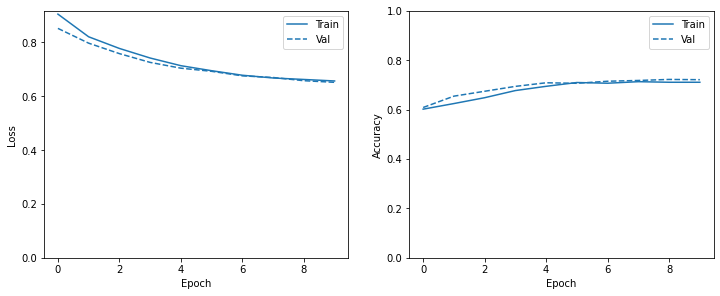

In [ ]:
model1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model1.history)
# print(model.history)

In [ ]:
prediction_prob = model1.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 0s 1ms/step
Accuracy of prediction on test set :  0.7216666666666667
              precision    recall  f1-score   support

           0       0.12      0.01      0.02        84
           1       0.74      0.88      0.81       736
           2       0.68      0.57      0.62       380

    accuracy                           0.72      1200
   macro avg       0.52      0.49      0.48      1200
weighted avg       0.68      0.72      0.69      1200



In [ ]:
model1.save('/content/gdrive/MyDrive/BSC-Project/saved_model/ff1_avg.h5')

# FF2

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model2.add(Lambda(lambda x: backend.mean(x, axis=1)))
model2.add(Dense(110, input_dim=embedding_matrix.shape[0], activation='relu'))
model2.add(Dense(120, input_dim=embedding_matrix.shape[0], activation='relu'))
model2.add(Dense(130, input_dim=embedding_matrix.shape[0], activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lambda_6 (Lambda)           (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 110)               11110     
                                                                 
 dense_21 (Dense)            (None, 120)               13320     
                                                                 
 dense_22 (Dense)            (None, 130)               15730     
                                                                 
 dense_23 (Dense)            (None, 3)                 393       
                                                                 
Total params: 1,763,653
Trainable params: 40,553
Non-t

In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 0.8773 - accuracy: 0.6086 - val_loss: 0.8085 - val_accuracy: 0.6094
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7527 - accuracy: 0.6620 - val_loss: 0.7369 - val_accuracy: 0.6729
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.7083 - val_loss: 0.6708 - val_accuracy: 0.7021
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.7146 - val_loss: 0.6701 - val_accuracy: 0.7135
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7190 - val_loss: 0.6374 - val_accuracy: 0.7292
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.7195 - val_loss: 0.6300 - val_accuracy: 0.7281
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.7276 - val_loss: 0.6307 - val_accuracy: 0.7354
Epoch 8/10
60/60 [==

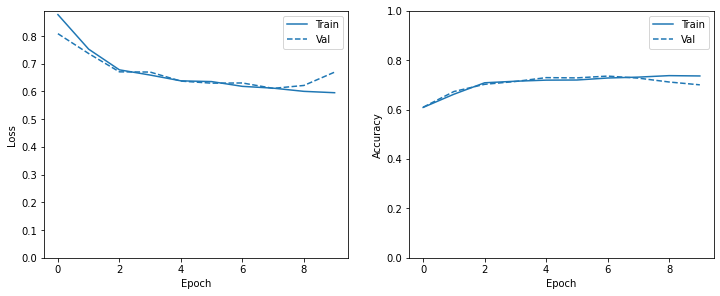

In [ ]:
model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model2.history)
# print(model.history)

In [ ]:
prediction_prob = model2.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 0s 1ms/step
Accuracy of prediction on test set :  0.6825
              precision    recall  f1-score   support

           0       0.23      0.04      0.06        84
           1       0.81      0.70      0.75       736
           2       0.54      0.79      0.64       380

    accuracy                           0.68      1200
   macro avg       0.53      0.51      0.49      1200
weighted avg       0.69      0.68      0.67      1200



In [ ]:
model2.save('/content/gdrive/MyDrive/BSC-Project/saved_model/ff.h5')

# FF3

In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=embedding_matrix.shape[0] ,output_dim=100,weights=[embedding_matrix],input_length=60,trainable=False))
model3.add(Lambda(lambda x: backend.mean(x, axis=1)))
model3.add(Dense(200, input_dim=embedding_matrix.shape[0], activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 100)           1723100   
                                                                 
 lambda_7 (Lambda)           (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 200)               20200     
                                                                 
 dense_25 (Dense)            (None, 3)                 603       
                                                                 
Total params: 1,743,903
Trainable params: 20,803
Non-trainable params: 1,723,100
_________________________________________________________________


In [ ]:
# Compiling our model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 0.8908 - accuracy: 0.6023 - val_loss: 0.8346 - val_accuracy: 0.6104
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8057 - accuracy: 0.6318 - val_loss: 0.7842 - val_accuracy: 0.6344
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.6599 - val_loss: 0.7443 - val_accuracy: 0.6854
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7281 - accuracy: 0.6857 - val_loss: 0.7186 - val_accuracy: 0.6771
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.6966 - val_loss: 0.6935 - val_accuracy: 0.7167
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.7057 - val_loss: 0.6921 - val_accuracy: 0.7104
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.7115 - val_loss: 0.6695 - val_accuracy: 0.7198
Epoch 8/10
60/60 [==

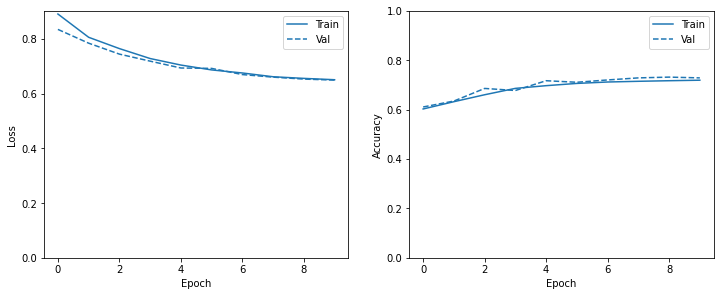

In [ ]:
model3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10 , batch_size = 64)

# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model3.history)
# print(model.history)

In [ ]:
prediction_prob = model3.predict(X_test)
y_pred = np.argmax(prediction_prob, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test, y_pred, labels=[0, 1, 2]))

38/38 [==============================] - 0s 1ms/step
Accuracy of prediction on test set :  0.73
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.72      0.93      0.81       736
           2       0.77      0.51      0.61       380

    accuracy                           0.73      1200
   macro avg       0.50      0.48      0.48      1200
weighted avg       0.69      0.73      0.69      1200

